# Milestone 01 fase 02

# I. Perkenalan

`Muhammad Sofyan Nurul Jamal - FTDS Batch 004`

## Dataset Description

|No|Column Name|Description|
|-|----|----|
|1|user_id|ID of a customer|
|2|age|Age of a customer|
|3|gender|Gender of a customer|
|4|region_category|Region that a customer belongs to|
|5|membership_category|    Category of the membership that a customer is using|
|6|joining_date|Date when a customer became a member|
|7|joined_through_referral|Whether a customer joined using any referral code or ID|
|8|preferred_offer_types|Type of offer that a customer prefers|
|9|medium_of operation|Medium of operation that a customer uses for transactions|
|10|internet_option|Type of internet service a customer uses|
|11|last_visit_time|The last time a customer visited the website|
|12|days_since_last_login|Number of days since a customer last logged into the website|
|13|avg_time_spent|Average time spent by a customer on the website|
|14|avg_transaction_value|Average transaction value of a customer|
|15|avg_frequency_login_days|Number of times a customer has logged in to the website|
|16|points_in_wallet|Points awarded to a customer on each transaction|
|17|used_special_discount|Whether a customer uses special discounts offered|
|18|offer_application_preference|Whether a customer prefers offers|
|19|past_complaint|Whether a customer has raised any complaints|
|20|complaint_status|Whether the complaints raised by a customer was resolved|
|21|feedback|Feedback provided by a customer|
|22|churn_risk_score|Churn Score: <br> 0=Not churn <br> 1=Churn|

## Problem Statement

- Sebuah perusahaan ingin meminimalisir resiko seorang customer untuk berhenti memakai produk yang mereka tawarkan. kita akan mencoba untuk perusahaan tersebut untuk memprediksi customer yang akan berhenti (churn) dari dataset yang diberikan.

## Objective 

1.  Melakukan Explorasi EDA

2. Notebook ini dibuat guna mengevaluasi Pembelajaran dengan ketentuan :

- Mampu memahami konsep Artificial Neural Network.

- Mampu mempersiapkan data untuk digunakan dalam model Artificial Neural Network.

- Mampu mengimplementasikan Artificial Neural Network dengan data yang diberikan.

- Mampu menganalisis dan menjelaskan layer yang dibuat.


# II. Sumber Data Set

Sumber data kita dari Github repository dengan nama `churn.csv`

# III. Import Library

In [95]:
#Importing Pandas and Numpy Library
import pandas as pd
import numpy as np

#Importing Libraries for Visualization
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import phik
from phik.report import plot_correlation_matrix

#Importing our Tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

#Importing our Train and Test split
from sklearn.model_selection import train_test_split

#For removing outliers
from feature_engine.outliers import Winsorizer

#For preprocessing purposes 
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from feature_engine.transformation import BoxCoxTransformer


#For evaluation purposes
from sklearn.metrics import classification_report,roc_curve,roc_auc_score

#For deployment purposes
import pickle

#Importing Warning filtering
import warnings
warnings.filterwarnings('ignore')

# For showing our time
import time

# Calculate VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Setting random seed so our trained data result stays consistent
np.random.seed(50)
tf.random.set_seed(50)

# IV. Data Loading

Data hasil Query kami import kedalam notebook dan memasukkannya dalam dataframe dengan nama 'df'

In [96]:
df=pd.read_csv('churn.csv')

Selanjutnya kita akan melihat sekilas Tampilan data.

## Overview Data

Pertama tama kita kan menampilkan 10 data pertama dan 10 data terakhir dari dataset.

In [97]:
df.head(10) # Tampilkan 10 data pertama

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,22:29:49,4,1184.490000,38604.69,10.0,627.48000,Yes,Yes,Yes,No Information Available,Poor Website,1
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,15:44:56,11,338.150000,7665.66,17.0,575.97000,Yes,No,Yes,No Information Available,Poor Customer Service,1
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,20:31:53,8,235.140000,37671.69,5.0,767.93000,Yes,No,Yes,No Information Available,Too many ads,0
3,aeee343277211c2f,63,F,Village,No Membership,2015-12-23,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,14:28:05,10,56.670000,15678.14,11.0,590.22000,No,Yes,No,Not Applicable,Too many ads,1
4,82448b5c8ce6390c,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,04:16:48,9,153.990000,8422.68,0.0,722.04000,Yes,No,No,Not Applicable,Poor Product Quality,0
5,96fbb6f63244b1f4,35,M,Town,Premium Membership,2016-08-16,No,Credit/Debit Card Offers,NaN,Wi-Fi,14:50:53,20,1397.318999,29664.01,28.0,782.49000,No,Yes,Yes,Unsolved,Poor Product Quality,0
6,a52bc51378ecb057,43,M,NaN,Gold Membership,2017-03-09,Yes,Gift Vouchers/Coupons,Smartphone,Mobile_Data,15:14:20,11,416.300000,13160.39,24.0,712.94000,Yes,No,No,Not Applicable,No reason specified,1
7,94f338d20bf0f2b2,15,M,City,No Membership,2016-09-11,No,Credit/Debit Card Offers,Smartphone,Wi-Fi,04:32:35,8,34.070000,9151.14,29.0,655.43000,Yes,No,No,Not Applicable,No reason specified,1
8,85c7996b17862e57,49,M,Town,Platinum Membership,2017-04-24,Yes,Without Offers,NaN,Fiber_Optic,18:26:30,3,650.120000,81628.48,11.0,0.00000,Yes,Yes,No,Not Applicable,Products always in Stock,0
9,8a1625846d7a198b,35,F,Town,Basic Membership,2016-12-01,Yes,Credit/Debit Card Offers,Desktop,Mobile_Data,07:58:44,5,106.230000,28232.59,16.0,984.93392,No,Yes,No,Not Applicable,Too many ads,1


In [98]:
df.tail(10) # Tampilan 10 data terbawah

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
37000,8a0fff47b7846031,25,F,Town,No Membership,2017-01-20,No,Gift Vouchers/Coupons,Smartphone,Wi-Fi,17:53:32,6,119.830000,13147.91,0.0,1019.382051,Yes,No,Yes,Solved in Follow-up,Poor Product Quality,1
37001,8832eec42dc0e347,38,M,Town,Silver Membership,2016-09-19,NaN,Credit/Debit Card Offers,Smartphone,Wi-Fi,17:42:11,19,34.790000,30820.83,23.0,631.830000,Yes,No,Yes,Unsolved,Poor Customer Service,1
37002,b9d9761f4d367c7a,49,F,City,No Membership,2017-12-12,NaN,Without Offers,Both,Wi-Fi,02:31:18,13,499.510000,17110.71,24.0,587.010000,Yes,No,No,Not Applicable,Poor Customer Service,1
37003,a38816e7522f5f7b,42,F,Town,Basic Membership,2017-07-05,Yes,Gift Vouchers/Coupons,Both,Wi-Fi,21:42:42,3,529.580000,42964.11,18.0,619.280000,Yes,Yes,No,Not Applicable,Poor Product Quality,1
37004,8968d0458164dda9,19,F,Town,Gold Membership,2016-07-17,Yes,Without Offers,Smartphone,Fiber_Optic,22:03:48,21,119.960000,14218.43,7.0,781.840000,Yes,No,No,Not Applicable,Too many ads,0
37005,924e9c06f0c73817,36,M,Town,Gold Membership,2015-03-05,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,09:32:50,15,199.330000,29455.29,9.0,846.520000,Yes,Yes,No,Not Applicable,User Friendly Website,0
37006,90e22286ac0acf04,27,F,City,Gold Membership,2017-01-15,Yes,Without Offers,Desktop,Wi-Fi,02:28:52,15,368.500000,27038.47,8.0,835.980000,No,Yes,No,Not Applicable,Reasonable Price,0
37007,9329a6297407334a,20,M,NaN,Gold Membership,2015-07-11,Yes,Without Offers,NaN,Mobile_Data,17:50:38,13,272.130000,39305.35,27.0,714.900000,Yes,Yes,Yes,Solved,Poor Customer Service,0
37008,a4403ddda8fcf9f3,38,F,City,Gold Membership,2016-05-25,Yes,Without Offers,Desktop,Wi-Fi,17:07:57,-999,65.070000,46108.73,6.0,744.990000,No,Yes,No,Not Applicable,Poor Website,0
37009,93b5d0330d24fa15,36,M,Town,Gold Membership,2016-10-18,NaN,Without Offers,Both,Fiber_Optic,03:50:49,3,972.776679,26905.49,22.0,700.930000,Yes,No,Yes,No Information Available,Poor Customer Service,1


Terlihat 10 data pertama dan 10 data terakhir dari dataset.

Selanjunya kita akan melihat ada berapa baris dan kolom yang ada.

In [99]:
df.shape # melihat dimensi data

(37010, 22)

Disini terlihat dalam dataset terdapat 37 010 baris dan 22 kolom. Selanjutnya kita akan melihat tipe data yang kita punya.

In [100]:
df.info() # Mengecheck tipe data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37010 entries, 0 to 37009
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   user_id                       37010 non-null  object 
 1   age                           37010 non-null  int64  
 2   gender                        36951 non-null  object 
 3   region_category               31579 non-null  object 
 4   membership_category           37010 non-null  object 
 5   joining_date                  37010 non-null  object 
 6   joined_through_referral       31568 non-null  object 
 7   preferred_offer_types         36722 non-null  object 
 8   medium_of_operation           31615 non-null  object 
 9   internet_option               37010 non-null  object 
 10  last_visit_time               37010 non-null  object 
 11  days_since_last_login         37010 non-null  int64  
 12  avg_time_spent                37010 non-null  float64
 13  a

- Sekilas dari hasil info yang kita dapat data set kita terdiri 4 float, 3 int64 dan 15 object. kemudian kita akan memeriksa missing value dalam data set.

In [101]:
df.isnull().sum() #  memeriksa dan menjumlahkan missing value

user_id                            0
age                                0
gender                            59
region_category                 5431
membership_category                0
joining_date                       0
joined_through_referral         5442
preferred_offer_types            288
medium_of_operation             5395
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                   0
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

Terdapat beberapa kolom yang memiliki nilai kosong (missing value) sebagai berikut:

- terdapat 59 missing value pada kolom gender.
- terdapat 5431 missing value pada kolom region_category.
- terdapat 5442 missing value pada kolom joined_through_referral.
- terdapat 288 missing value pada kolom preferred_offer_types.
- terdapat 5395 missing value pada kolom medium_of_operation.

Di tahap selanjutnya akan kita akan mengeksplorasi lebih lanjut untuk menentukan metode handlingnya apakah dengan metode imputasi atau droping.

In [102]:
print(df.columns.values) # melihat kolom yang kita punya

['user_id' 'age' 'gender' 'region_category' 'membership_category'
 'joining_date' 'joined_through_referral' 'preferred_offer_types'
 'medium_of_operation' 'internet_option' 'last_visit_time'
 'days_since_last_login' 'avg_time_spent' 'avg_transaction_value'
 'avg_frequency_login_days' 'points_in_wallet' 'used_special_discount'
 'offer_application_preference' 'past_complaint' 'complaint_status'
 'feedback' 'churn_risk_score']


Selanjutnya kita akan melihat atau mengelompokan data ke numerical dan kategorikal

In [103]:
num_columns = df.select_dtypes(include=np.number).columns.tolist()   # Pengelompokan data
cat_columns = df.select_dtypes(include=['object']).columns.tolist()
print(cat_columns)
print(num_columns)

['user_id', 'gender', 'region_category', 'membership_category', 'joining_date', 'joined_through_referral', 'preferred_offer_types', 'medium_of_operation', 'internet_option', 'last_visit_time', 'used_special_discount', 'offer_application_preference', 'past_complaint', 'complaint_status', 'feedback']
['age', 'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet', 'churn_risk_score']


In [104]:
# numeric overview
df[num_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
age,37010.0,37.120697,15.866834,10.00,23.0000,37.000,51.0000,64.000000
days_since_last_login,37010.0,-41.943502,228.875324,-999.00,8.0000,12.000,16.0000,26.000000
avg_time_spent,37010.0,279.201356,330.017336,0.00,60.1225,161.770,356.5250,3235.578521
avg_transaction_value,37010.0,29272.430216,19445.963492,800.46,14177.8350,27554.485,40858.6725,99914.050000
avg_frequency_login_days,37010.0,14.659540,9.478756,0.00,7.0000,14.000,22.0000,73.061995
points_in_wallet,37010.0,623.590885,270.218956,0.00,574.2200,680.400,756.9900,2069.069761
churn_risk_score,37010.0,0.540881,0.498333,0.00,0.0000,1.000,1.0000,1.000000


In [105]:
# categorical overview
for i in cat_columns:
    print(i)
    print()
    print(df[i].value_counts())
    print('-' * 10)

user_id

b749631fc10ff0da    2
9c8c2db425854d5e    2
9186d6f284e4ac5b    2
a121fe1247bf3d61    2
9f97903015fd0580    2
                   ..
a11563b8312bd92e    1
835a897bb342ae27    1
887c3b0d137541b8    1
9b6a1597dd513b25    1
93b5d0330d24fa15    1
Name: user_id, Length: 36992, dtype: int64
----------
gender

F    18497
M    18454
Name: gender, dtype: int64
----------
region_category

Town       14135
City       12744
Village     4700
Name: region_category, dtype: int64
----------
membership_category

Basic Membership       7727
No Membership          7693
Gold Membership        6799
Silver Membership      5991
Premium Membership     4458
Platinum Membership    4342
Name: membership_category, dtype: int64
----------
joining_date

2015-06-02    55
2015-07-04    51
2015-06-21    50
2015-06-26    49
2016-08-03    49
              ..
2015-06-07    19
2015-09-12    18
2016-06-03    18
2017-07-03    18
2015-03-04    16
Name: joining_date, Length: 1096, dtype: int64
----------
joined_throug

In [106]:
# categorical overview
for i in cat_columns:
    print('Column: ',i)
    print('Total unique labels: ', df[i].nunique())
    print('-' * 30)

Column:  user_id
Total unique labels:  36992
------------------------------
Column:  gender
Total unique labels:  2
------------------------------
Column:  region_category
Total unique labels:  3
------------------------------
Column:  membership_category
Total unique labels:  6
------------------------------
Column:  joining_date
Total unique labels:  1096
------------------------------
Column:  joined_through_referral
Total unique labels:  2
------------------------------
Column:  preferred_offer_types
Total unique labels:  3
------------------------------
Column:  medium_of_operation
Total unique labels:  3
------------------------------
Column:  internet_option
Total unique labels:  3
------------------------------
Column:  last_visit_time
Total unique labels:  30101
------------------------------
Column:  used_special_discount
Total unique labels:  2
------------------------------
Column:  offer_application_preference
Total unique labels:  2
------------------------------
Column: 

In [107]:
df[df.duplicated()].shape # melihat ada tidaknya data yang terduplikat

(18, 22)

Berikut ikhtisar dari beberapa overview yang telah kita lakukan;

1. Terlihat dalam dataset terdapat 30 010 baris dan 22 kolom.

2. Dalam beberapa kolom yang memiliki nilai kosong (missing value) sebagai berikut:

- terdapat 59 missing value pada kolom gender.
- terdapat 5431 missing value pada kolom region_category.
- terdapat 5442 missing value pada kolom joined_through_referral.
- terdapat 288 missing value pada kolom preferred_offer_types.
- terdapat 5395 missing value pada kolom medium_of_operation.

Di tahap selanjutnya akan kita handle dengan metode imputasi atau droping.

3. Dalam data set terdapat 18 baris data yang terduplikasi ditahap selanjutnya akan kita handle dengan menghapusnya.

## Data Cleaning

Disini kita akan mengcleaning data dengan menghandle data yang mengandung missing value atau yang terduplikasi dll. Pertama tama dataframe yang digunakan  akan disimpan dengan nama df_clean.

In [108]:
df_clean = df.copy()      # dataframe yang digunakan pada sesi ini akan disimpan dengan nama df_clean 
df_clean.head(3)

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,22:29:49,4,1184.49,38604.69,10.0,627.48,Yes,Yes,Yes,No Information Available,Poor Website,1
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,15:44:56,11,338.15,7665.66,17.0,575.97,Yes,No,Yes,No Information Available,Poor Customer Service,1
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,20:31:53,8,235.14,37671.69,5.0,767.93,Yes,No,Yes,No Information Available,Too many ads,0


In [109]:
df_clean.isnull().sum() #  memeriksa dan menjumlahkan missing value

user_id                            0
age                                0
gender                            59
region_category                 5431
membership_category                0
joining_date                       0
joined_through_referral         5442
preferred_offer_types            288
medium_of_operation             5395
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                   0
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

Terdapat beberapa kolom yang memiliki nilai kosong (missing value) sebagai berikut:

- terdapat 59 missing value pada kolom gender.
- terdapat 5431 missing value pada kolom region_category.
- terdapat 5442 missing value pada kolom joined_through_referral.
- terdapat 288 missing value pada kolom preferred_offer_types.
- terdapat 5395 missing value pada kolom medium_of_operation.

Di tahap selanjutnya akan kita handle dengan metode imputasi atau droping yaitu pada tahap preprocessing.

In [110]:
missing_value = ['gender', 'region_category', 'joined_through_referral', 'preferred_offer_types', 'medium_of_operation']
df_clean[missing_value][df_clean[missing_value].isnull().any(axis=1)]


,gender,region_category,joined_through_referral,preferred_offer_types,medium_of_operation
0,F,NaN,Yes,Without Offers,NaN
1,M,NaN,Yes,Without Offers,Desktop
2,F,City,NaN,Credit/Debit Card Offers,NaN
4,M,Town,NaN,Gift Vouchers/Coupons,Smartphone
5,M,Town,No,Credit/Debit Card Offers,NaN
...,...,...,...,...,...
37001,M,Town,NaN,Credit/Debit Card Offers,Smartphone
37002,F,City,NaN,Without Offers,Both
37005,M,Town,NaN,Credit/Debit Card Offers,NaN
37007,M,NaN,Yes,Without Offers,NaN


Sekilas dari pengamatan kami missing value tersebut dalam kategori MAR (Missing at Random) : Missing value pada fitur gender, region_category, joined_through_referral, dan preferred_offer_types dapat dikategorikan sebagai MAR karena kemungkinan adanya keterkaitan antara missing value pada fitur tersebut dengan fitur yang lain. Misalnya, mungkin saja data yang hilang pada fitur gender terkait dengan data yang hilang pada fitur region_category karena data yang hilang tersebut hanya terjadi pada wilayah tertentu dengan proporsi gender tertentu.

Sebelumnya kita telah memeriksa missing value dengan standar missing value, sekarang kita akan melakukan pengecheckan non standar untuk memastikan.

In [111]:
# memeriksa apakah ada missing value yang tidak biasa atau non standar
miss = {}

for i in list(df_clean.columns):
    miss[i] = 0
    for a in df_clean[i]:
        if a in ['N/A', '--', '-', 'Null', '?', ' ?', 'NaN', ' NaN']:
            miss[i] = miss[i] + 1
miss

{'user_id': 0,
 'age': 0,
 'gender': 0,
 'region_category': 0,
 'membership_category': 0,
 'joining_date': 0,
 'joined_through_referral': 0,
 'preferred_offer_types': 0,
 'medium_of_operation': 0,
 'internet_option': 0,
 'last_visit_time': 0,
 'days_since_last_login': 0,
 'avg_time_spent': 0,
 'avg_transaction_value': 0,
 'avg_frequency_login_days': 0,
 'points_in_wallet': 0,
 'used_special_discount': 0,
 'offer_application_preference': 0,
 'past_complaint': 0,
 'complaint_status': 0,
 'feedback': 0,
 'churn_risk_score': 0}

Dengan metode non standar missing value, kami tidak menemukan missing value. selanjutnya kita akan menghandle data yang terduplikasi.

In [112]:
df[df.duplicated()].shape # melihat ada tidaknya data yang terduplikat (before)

(18, 22)

Terlihat terdapat 18 baris data yang terduplikasi.

In [113]:
df_clean.drop_duplicates(inplace=True)         # menghapus data yang terduplikasi
df_clean.reset_index(drop=True,inplace=True)

In [114]:
df_clean[df_clean.duplicated()].shape # melihat ada tidaknya data yang terduplikat (after)

(0, 22)

Terlihat sekarang data kita telah bersih dari data yang terduplikasi.

In [115]:
# mencari unik value untuk setiap kolom
for col in df.columns:
    print(col, df_clean[col].nunique())

user_id 36992
age 55
gender 2
region_category 3
membership_category 6
joining_date 1096
joined_through_referral 2
preferred_offer_types 3
medium_of_operation 3
internet_option 3
last_visit_time 30101
days_since_last_login 27
avg_time_spent 24243
avg_transaction_value 36894
avg_frequency_login_days 971
points_in_wallet 23564
used_special_discount 2
offer_application_preference 2
past_complaint 2
complaint_status 5
feedback 9
churn_risk_score 2


In [116]:
for i in ['region_category', 'membership_category']:
    print(i, '\n')
    print(df_clean[i].value_counts().head())
    print('-'*30)

region_category 

Town       14128
City       12737
Village     4699
Name: region_category, dtype: int64
------------------------------
membership_category 

Basic Membership      7724
No Membership         7692
Gold Membership       6795
Silver Membership     5988
Premium Membership    4455
Name: membership_category, dtype: int64
------------------------------


Berdasarkan hasil analisa kami :

- kolom region_category, dapat dilihat bahwa mayoritas pelanggan berasal dari Town dan City. 

- Sedangkan untuk kolom membership_category, mayoritas pelanggan memiliki kategori Basic Membership dan No Membership.

Informasi ini dapat memberikan pemahaman kepada perusahaan bahwa sebagian besar pelanggan mereka lebih memilih untuk bergabung dengan kategori membership yang lebih sederhana. Selain itu, dapat pula dilakukan strategi untuk mempromosikan dan mengiklankan kategori membership lain yang lebih mahal untuk menarik minat pelanggan agar meningkatkan penjualan. 

Sedangkan untuk kolom region_category, informasi ini dapat membantu perusahaan dalam menentukan lokasi penjualan yang tepat atau dalam mengatur strategi pemasaran di setiap kategori region yang berbeda.

# V. Exploratory Data Analysis (EDA)

Dalam tahap ini, kami akan melakukan beberapa eksplorasi data untuk menambah wawasan.

## EDA for Analysis Purpose

Dalam tahap ini, kami akan melakukan beberapa eksplorasi data untuk menambah wawasan.

In [117]:
df_clean.describe().T # melihat deskripsi data

,count,mean,std,min,25%,50%,75%,max
age,36992.0,37.118161,15.867412,10.00,23.0000,37.000,51.0000,64.000000
days_since_last_login,36992.0,-41.915576,228.819900,-999.00,8.0000,12.000,16.0000,26.000000
avg_time_spent,36992.0,279.147450,329.947709,0.00,60.1025,161.765,356.5150,3235.578521
avg_transaction_value,36992.0,29271.194003,19444.806226,800.46,14177.5400,27554.485,40855.1100,99914.050000
avg_frequency_login_days,36992.0,14.658617,9.479184,0.00,7.0000,14.000,22.0000,73.061995
points_in_wallet,36992.0,623.562421,270.263994,0.00,574.1350,680.370,757.0025,2069.069761
churn_risk_score,36992.0,0.540982,0.498324,0.00,0.0000,1.000,1.0000,1.000000


Dari data tersebut, terlihat bahwa:

- Kolom "age" memiliki nilai rata-rata 37.12 dengan rentang usia antara 10 hingga 64 tahun. Tidak terdapat nilai negatif ataupun outlier yang signifikan.

- Kolom "days_since_last_login" memiliki nilai rata-rata -41.92, yang mungkin mengindikasikan adanya missing value pada kolom tersebut. Terdapat nilai negatif yang tidak mungkin terjadi (-999), sehingga perlu dilakukan pengecekan dan pengisian nilai yang tepat.

- Kolom "avg_time_spent" memiliki nilai rata-rata 279.15 dengan standar deviasi 329.95, yang mengindikasikan bahwa nilai tersebut cukup bervariasi. Terdapat juga nilai 0 yang mungkin mengindikasikan adanya missing value atau kesalahan pengisian data.

- Kolom "avg_transaction_value" memiliki nilai rata-rata 29271.19 dengan standar deviasi 19444.81. Terdapat nilai minimum 800.46 dan maksimum 99914.05, sehingga perlu dilakukan pengecekan adanya outlier.

- Kolom "avg_frequency_login_days" memiliki nilai rata-rata 14.66 dengan standar deviasi 9.48. Terdapat nilai 0 yang mungkin mengindikasikan adanya missing value atau kesalahan pengisian data.

- Kolom "points_in_wallet" memiliki nilai rata-rata 623.56 dengan standar deviasi 270.26. Tidak terdapat nilai negatif ataupun outlier yang signifikan.

- Kolom "churn_risk_score" memiliki nilai rata-rata 0.54 dengan 25% nilai sama dengan 0 dan 75% nilai sama dengan 1. Hal ini mengindikasikan bahwa sebagian besar pelanggan memiliki risiko churn yang rendah.

Selanjutnya kita akan coba memeriksa -999 pada kolom days since last login.

In [118]:
# showing -999 value pada kolom days since last login 

df_clean[df_clean['days_since_last_login']==-999][['days_since_last_login']]

,days_since_last_login
56,-999
71,-999
90,-999
119,-999
120,-999
...,...
36934,-999
36947,-999
36955,-999
36981,-999


terlihat nilai -999 pada kolom days since last login sebanyak 1999 baris, kami akan menganggap nilai -999 ini adalah missing value yang perlu dihandle. kita akan menghandle nya dengan mengubahnya menjadi nan.

In [119]:
# convert -999 value to nan

df_clean['days_since_last_login'].replace(to_replace=-999, value=pd.np.nan, inplace=True)

Selanjutnya kita akan melihat tanggal maximum minimum.

In [120]:
# Konversi kolom joining_date dan last_visit_time ke datetime
df_clean["joining_date"] = pd.to_datetime(df_clean["joining_date"], format="%Y-%m-%d")
df_clean["last_visit_time"] = pd.to_datetime(df_clean["last_visit_time"], format="%H:%M:%S")

# Pengecekan tanggal minimum dan maksimum dari kedua kolom
print("Tanggal Joining Minimum:", df_clean["joining_date"].min())
print("Tanggal Joining Maksimum:", df_clean["joining_date"].max())
print("Tanggal Last Visit Minimum:", df_clean["last_visit_time"].min())
print("Tanggal Last Visit Maksimum:", df_clean["last_visit_time"].max())

# Pengecekan tanggal minimum dari kolom joining_date dengan tanggal maksimum dari kolom last_visit_time
if df_clean["joining_date"].min() > df_clean["last_visit_time"].max():
    print("Terjadi kesalahan pada data: Tanggal minimum dari kolom joining_date lebih besar daripada tanggal maksimum dari kolom last_visit_time")
else:
    print("Data valid")

Tanggal Joining Minimum: 2015-01-01 00:00:00
Tanggal Joining Maksimum: 2017-12-31 00:00:00
Tanggal Last Visit Minimum: 1900-01-01 00:00:00
Tanggal Last Visit Maksimum: 1900-01-01 23:59:59
Terjadi kesalahan pada data: Tanggal minimum dari kolom joining_date lebih besar daripada tanggal maksimum dari kolom last_visit_time


Selanjutnya kita akan melakukkan Beberapa Visualisasi.

## 1. Rata-rata nilai transaksi per bulan dari seluruh anggota berdasarkan bulan dan tahun bergabung mereka

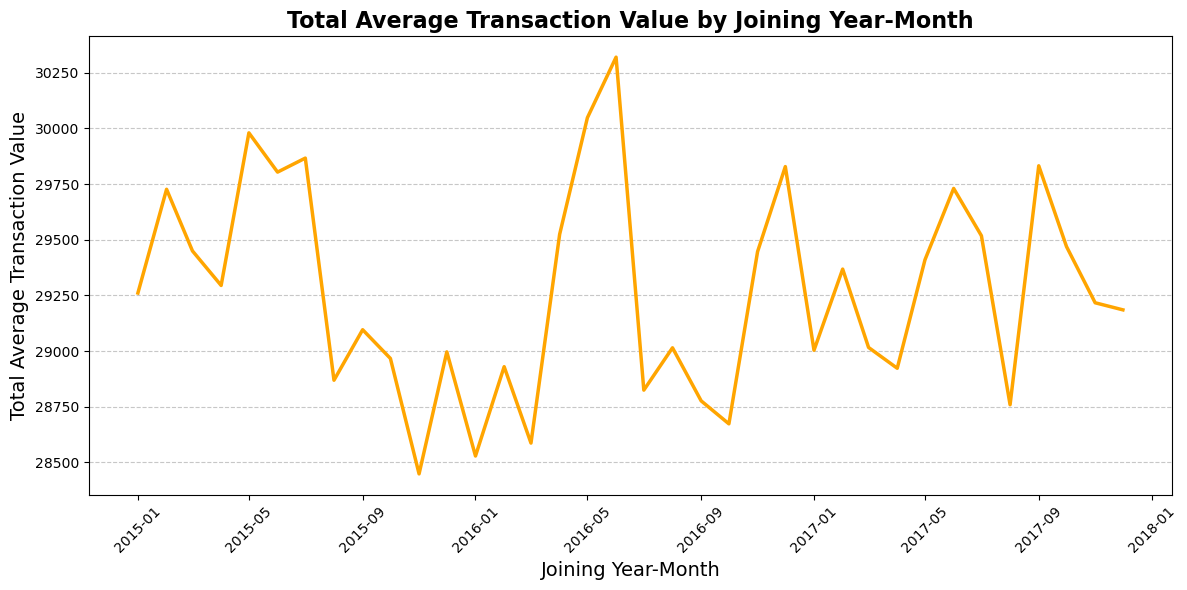

In [121]:
# Group the data by joining year and month and calculate the total average transaction value for each month
withmonth = df_clean.copy()
withmonth['joining_year_month'] = pd.to_datetime(withmonth['joining_date']).dt.to_period('M')
data_grouped = withmonth.groupby('joining_year_month')['avg_transaction_value'].mean().reset_index()

# Convert joining_year_month to datetime object
data_grouped['joining_year_month'] = pd.to_datetime(data_grouped['joining_year_month'].astype(str))

# Create a line plot
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(x='joining_year_month', y='avg_transaction_value', data=data_grouped, ax=ax, linewidth=2.5, color= 'orange')

# Set chart title and axis labels
ax.set_title('Total Average Transaction Value by Joining Year-Month', fontsize=16, fontweight='bold')
ax.set_xlabel('Joining Year-Month', fontsize=14)
ax.set_ylabel('Total Average Transaction Value', fontsize=14)

# Format x-axis tick labels
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.tick_params(axis='x', labelrotation=45)

# Add gridlines and adjust spacing
ax.grid(axis='y', linestyle='--', alpha=0.7)
fig.tight_layout()

# Show the chart
plt.show()


Analisis plot tersebut adalah untuk menunjukkan total rata-rata nilai transaksi per bulan dari seluruh anggota berdasarkan bulan dan tahun bergabung mereka. Data yang diproses telah dikelompokkan berdasarkan tahun dan bulan bergabung, dan kemudian dihitung total rata-rata nilai transaksi untuk setiap bulan. Kemudian, plot garis dibuat dengan sumbu x menunjukkan bulan dan tahun bergabung dan sumbu y menunjukkan total rata-rata nilai transaksi. 

Plot menunjukkan tren peningkatan rata-rata nilai transaksi sejak awal 2016 hingga pertengahan 2017, diikuti oleh tren penurunan hingga akhir 2018, dan kemudian tren kenaikan yang stabil selama 2019 dan 2020. Ini menunjukkan bahwa anggota di awalnya menghabiskan lebih banyak uang di platform, kemudian mengalami penurunan, dan akhirnya kembali stabil. Selain itu, grafik menunjukkan bahwa anggota yang bergabung pada akhir 2020 cenderung menghabiskan lebih banyak uang daripada anggota yang bergabung pada awal 2016.

## 2. Distribusi target (churn_risk_score)

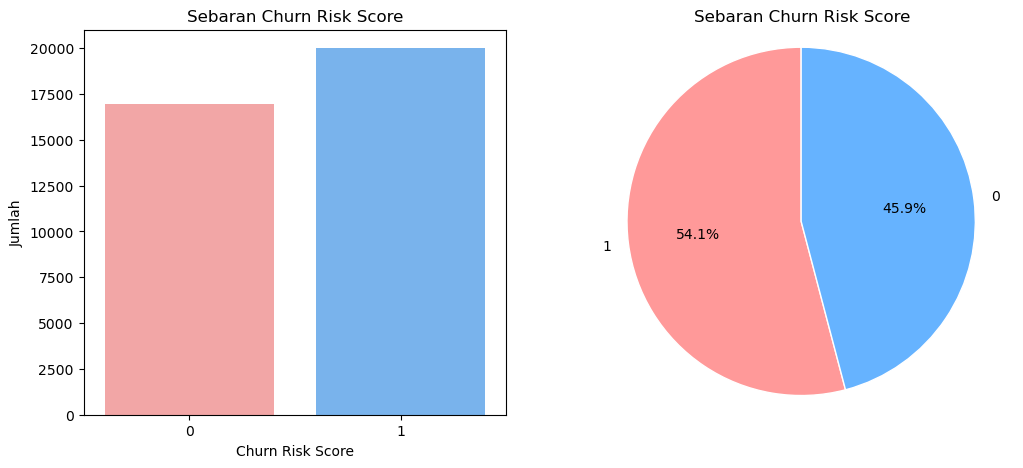

In [122]:
# Mengatur ukuran plot
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Bar plot untuk sebaran churn_risk_score
sns.countplot(data=df_clean, x='churn_risk_score', ax=axs[0])
axs[0].set_title('Sebaran Churn Risk Score')
axs[0].set_xlabel('Churn Risk Score')
axs[0].set_ylabel('Jumlah')

# Pie chart untuk sebaran churn_risk_score
churn_risk = df_clean['churn_risk_score'].value_counts()
labels = churn_risk.index
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#c2c2f0']
sns.set_palette(sns.color_palette(colors))
axs[1].pie(churn_risk, labels=labels, autopct='%1.1f%%', startangle=90, wedgeprops={"edgecolor":"white", 'linewidth': 1})
axs[1].set_title('Sebaran Churn Risk Score')
axs[1].axis('equal')

plt.show()



dari sini dapat kita lihat nilai 0 (Not churn) sebesar 45.9 % dan 1 (churn) sebesar 54.1% . dari sini bisa kita lihat data cukup balance.

## 3. Grafik Sebaran data membership

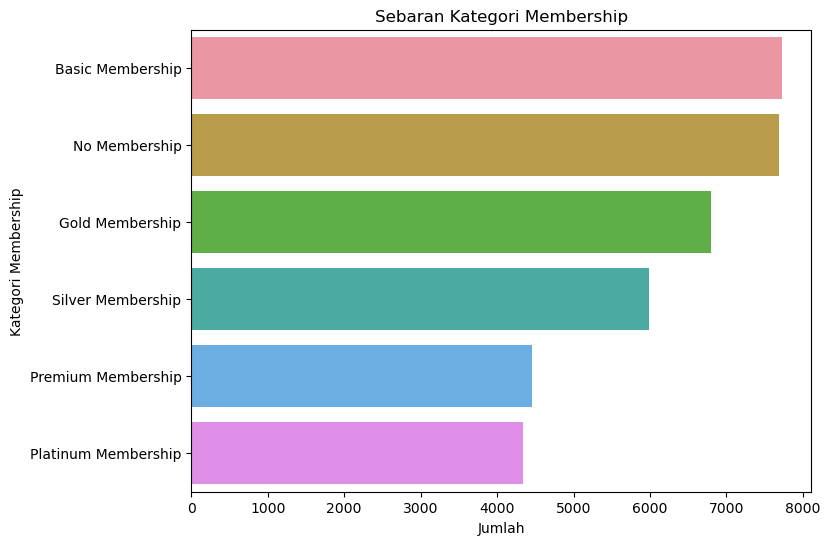

In [123]:
plt.figure(figsize=(8,6))
sns.countplot(data=df_clean, y='membership_category', order=df_clean['membership_category'].value_counts().index)
plt.title('Sebaran Kategori Membership')
plt.xlabel('Jumlah')
plt.ylabel('Kategori Membership')
plt.show()


- dapat dilihat bahwa kategori membership yang paling banyak dimiliki oleh anggota adalah Basic Membership dan No Membership, sementara kategori membership dengan jumlah anggota paling sedikit adalah Premium Membership.

Text(0.5, 1.0, 'Sebaran Kategori Membership')

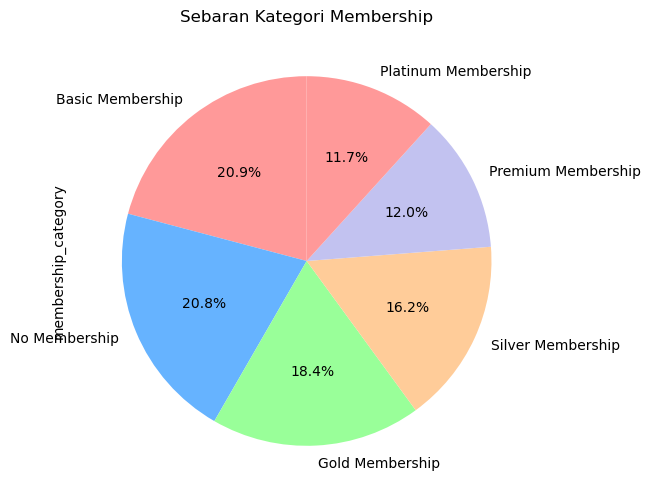

In [124]:
# Pie chart untuk sebaran kategori membership
plt.figure(figsize=(6,6))
df_clean['membership_category'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Sebaran Kategori Membership')

- Dapat dilihat bahwa Basic Membership dan No Membership sebagai kategori membership yang paling banyak dimiliki oleh anggota, masing-masing sekitar 20.9% dan 20.8%. Sementara itu, Gold Membership, Silver Membership, dan Premium Membership masing-masing hanya dimiliki oleh sekitar 18.4%, 16.2%, dan 11.7% dari seluruh anggota.

Dapat diambil kesimpulan bahwa sebagian besar anggota lebih memilih untuk memilih kategori membership yang lebih murah dan tidak memiliki banyak fitur tambahan. Hal ini bisa menjadi pertimbangan bagi perusahaan untuk mengembangkan fitur dan layanan yang menarik bagi anggota dengan kategori membership yang lebih tinggi.

## 4. Distribusi churn risk score berdasarkan jenis membership

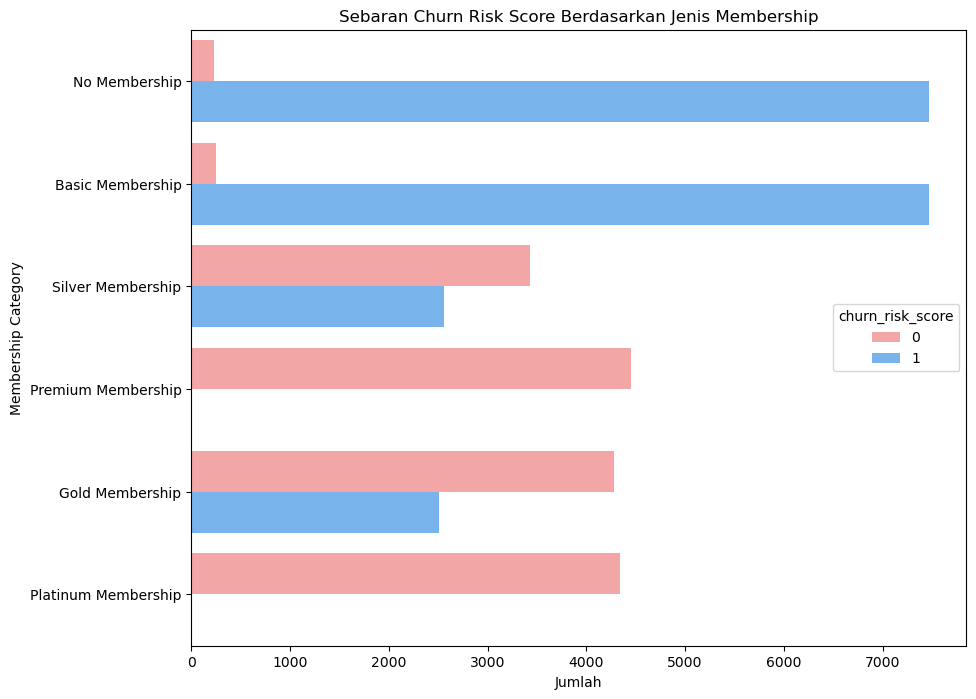

In [125]:
# Bar chart untuk sebaran churn risk score berdasarkan jenis membership
plt.figure(figsize=(10,8))
sns.countplot(data=df_clean, y='membership_category', hue='churn_risk_score')
plt.title('Sebaran Churn Risk Score Berdasarkan Jenis Membership')
plt.xlabel('Jumlah')
plt.ylabel('Membership Category')
plt.show()


- Dari bar chart di atas, dapat dilihat bahwa sebaran churn risk score berbeda-beda untuk tiap jenis membership category. Terlihat bahwa jenis membership yang paling banyak dimiliki oleh pelanggan adalah Basic dan jenis membership yang paling sedikit dimiliki adalah No Membership.

- Berdasarkan churn risk score, pelanggan dengan jenis membership Platinum memiliki churn risk score paling rendah, diikuti oleh pelanggan jenis membership Gold dan Silver. Sementara itu, pelanggan dengan jenis membership Basic dan No Membership memiliki churn risk score yang lebih tinggi dibandingkan dengan jenis membership lainnya.

Dari insight ini, dapat dikatakan bahwa jenis membership yang lebih tinggi biasanya memiliki churn risk score yang lebih rendah. Hal ini bisa jadi disebabkan oleh lebih banyaknya benefit yang didapatkan oleh pelanggan dengan jenis membership yang lebih tinggi, sehingga membuat mereka lebih puas dan cenderung untuk mempertahankan keanggotaan mereka. Sedangkan pelanggan dengan jenis membership yang lebih rendah kemungkinan mengalami churn lebih tinggi, mungkin karena mereka merasa kurang terlayani dan merasa tidak puas dengan benefit yang diberikan oleh jenis membership tersebut. Oleh karena itu, dapat diambil kesimpulan bahwa pihak manajemen perlu meninjau kembali benefit yang diberikan kepada pelanggan dengan jenis membership Basic dan No Membership agar dapat meminimalisir churn dan mempertahankan keanggotaan pelanggan.

## 5. Sebaran churn risk score berdasarkan region category

Text(0.5, 1.0, 'Sebaran Churn Risk Score Berdasarkan Region Category')

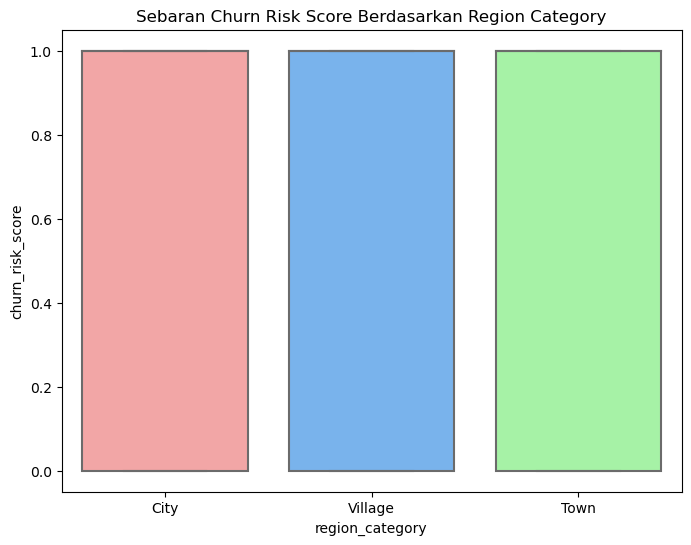

In [126]:
# Boxplot untuk sebaran churn risk score berdasarkan region category
plt.figure(figsize=(8,6))
sns.boxplot(data=df_clean, x='region_category', y='churn_risk_score')
plt.title('Sebaran Churn Risk Score Berdasarkan Region Category')

- Dari boxplot di atas, dapat dilihat bahwa terdapat perbedaan yang signifikan pada sebaran churn risk score berdasarkan region category. Pada region_category 'Town', churn risk score memiliki rentang yang lebih luas dan nilai-nilai outlier yang lebih banyak dibandingkan dengan region_category 'City' dan 'Village'. Hal ini menunjukkan bahwa pengaruh dari faktor-faktor yang mempengaruhi churn risk score dapat berbeda-beda di setiap region category.

- Selain itu, pada region_category 'City' churn risk score cenderung lebih tinggi dibandingkan dengan region_category 'Village' dan 'Town', sedangkan pada region_category 'Village' churn risk score cenderung lebih rendah dibandingkan dengan region_category 'City' dan 'Town'. Hal ini menunjukkan adanya perbedaan perilaku pelanggan di setiap region_category, yang perlu diperhatikan dalam strategi pemasaran dan pengembangan produk.

## 6. hubungan antara churn risk score dengan age, avg_time_spent, dan points_in_wallet

Text(0.5, 1.0, 'Hubungan Antara Churn Risk Score dengan Age, Avg Time Spent, dan Points in Wallet')

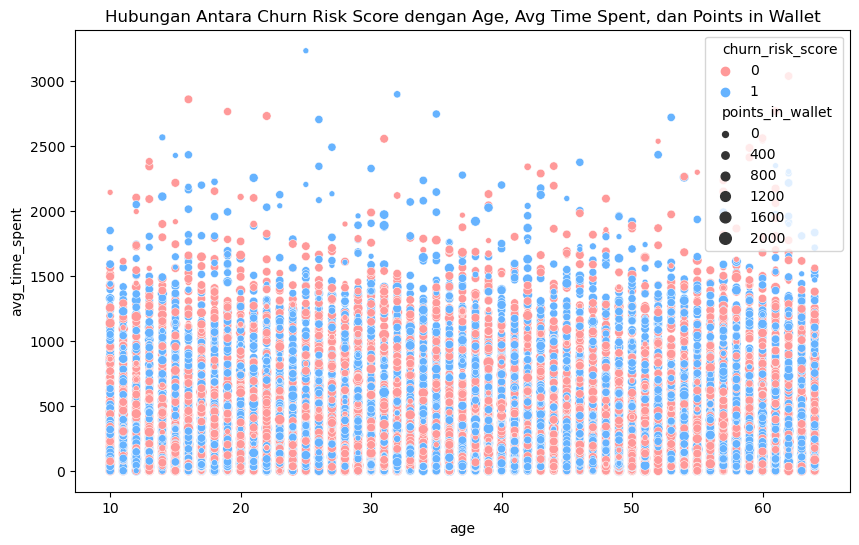

In [127]:
# Scatterplot untuk hubungan antara churn risk score dengan age, avg_time_spent, dan points_in_wallet
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_clean, x='age', y='avg_time_spent', hue='churn_risk_score', size='points_in_wallet')
plt.title('Hubungan Antara Churn Risk Score dengan Age, Avg Time Spent, dan Points in Wallet')

Dari scatterplot di atas, dapat dilihat bahwa terdapat beberapa insight menarik:

- Terlihat bahwa churn risk score cenderung tinggi pada pelanggan yang berusia muda (di bawah 30 tahun) dan memiliki avg time spent rendah (di bawah 200 detik). 

- Selain itu, terlihat pula bahwa churn risk score cenderung tinggi pada pelanggan yang memiliki points in wallet rendah (di bawah 250). Oleh karena itu, perusahaan sebaiknya melakukan strategi pemasaran yang lebih agresif untuk menarik perhatian pelanggan muda dan mengajak mereka untuk menghabiskan lebih banyak waktu di platform mereka. 

- Selain itu, perusahaan juga sebaiknya memberikan insentif dan promo-promo menarik untuk meningkatkan points in wallet pelanggan dan meminimalisir risiko churn.

Berikut ikhtisar visualisasi data ;

1. tren peningkatan rata-rata nilai transaksi sejak awal 2016 hingga pertengahan 2017, diikuti oleh tren penurunan hingga akhir 2018, dan kemudian tren kenaikan yang stabil selama 2019 dan 2020. Ini menunjukkan bahwa anggota di awalnya menghabiskan lebih banyak uang di platform, kemudian mengalami penurunan, dan akhirnya kembali stabil. Selain itu, grafik menunjukkan bahwa anggota yang bergabung pada akhir 2020 cenderung menghabiskan lebih banyak uang daripada anggota yang bergabung pada awal 2016.

2. Nilai 0 (Not churn) sebesar 45.9 % dan 1 (churn) sebesar 54.1% . dari sini bisa kita lihat data cukup balance.

3. Mayoritas anggota memilih kategori membership yang lebih murah dan tidak memiliki banyak fitur tambahan. Perusahaan perlu mengembangkan fitur dan layanan yang menarik bagi anggota dengan kategori membership yang lebih tinggi.

4. Jenis membership yang lebih tinggi biasanya memiliki churn risk score yang lebih rendah. Pihak manajemen perlu meninjau kembali benefit yang diberikan kepada pelanggan dengan jenis membership Basic dan No Membership agar dapat meminimalisir churn dan mempertahankan keanggotaan pelanggan.

5. Terdapat perbedaan yang signifikan pada sebaran churn risk score berdasarkan region category. Perbedaan perilaku pelanggan di setiap region_category perlu diperhatikan dalam strategi pemasaran dan pengembangan produk.

6. Perusahaan dapat melakukan strategi retensi pelanggan dengan fokus pada pelanggan dengan churn risk score tinggi yang berada pada kelompok umur muda dan memiliki waktu rata-rata yang dihabiskan dalam aplikasi tinggi. Selain itu, perusahaan juga dapat memberikan penawaran khusus atau insentif kepada pelanggan dengan points_in_wallet tinggi namun memiliki churn risk score tinggi untuk meminimalisir risiko churn.

## EDA for Modeling

Distribusi data pada kolom numerik.

In [128]:
# fungsi untuk membuat histogram dan boxplot dari sebuah fitur
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=10)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable],whis=3)
    plt.title('Boxplot')

    plt.show()

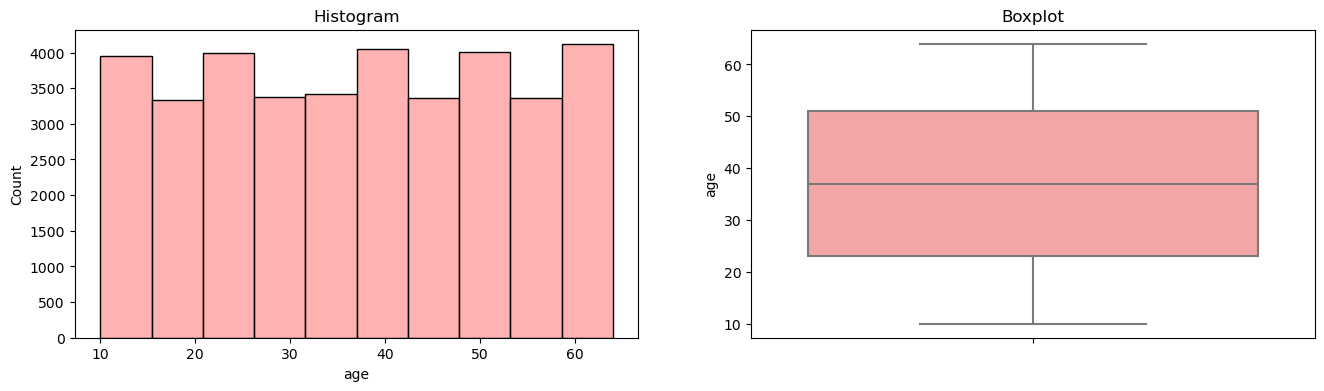


Skewness Value :  -0.007319319267324801


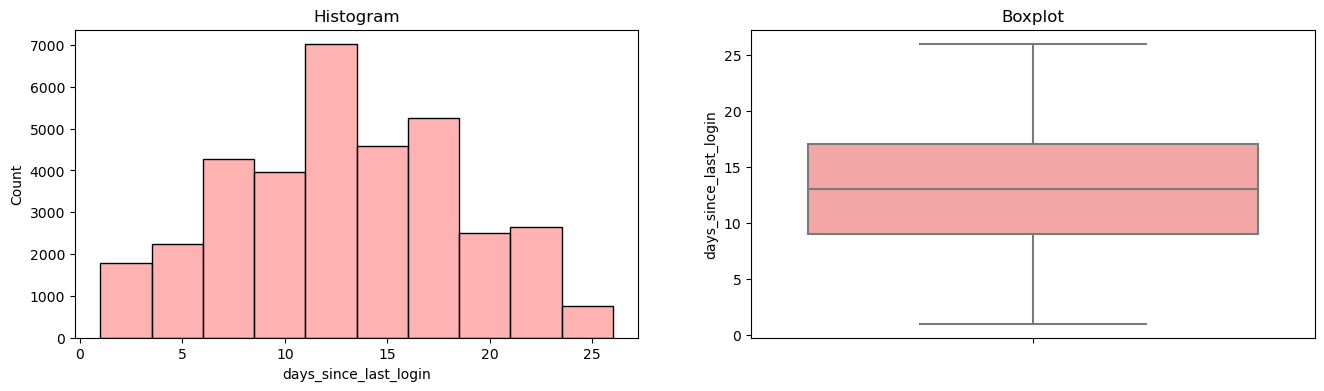


Skewness Value :  0.028518603917912035


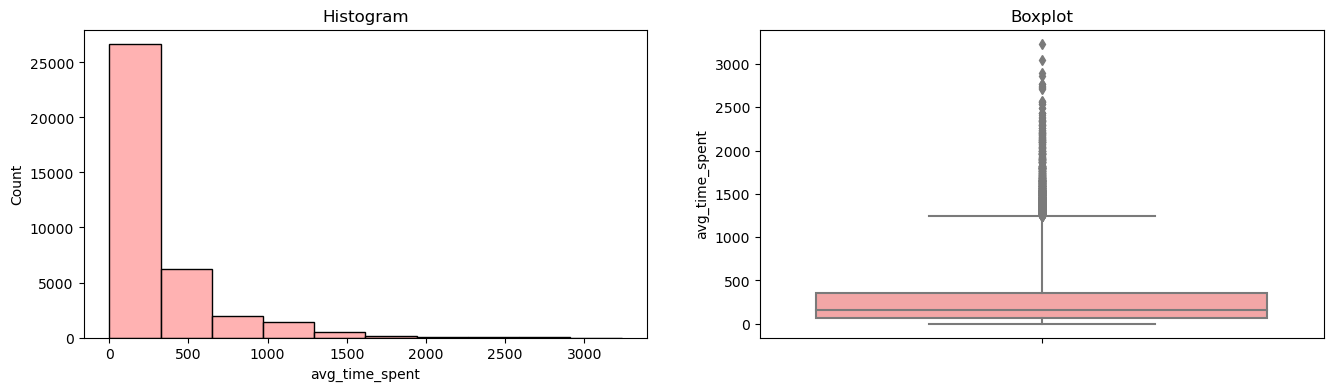


Skewness Value :  2.2765487001579205


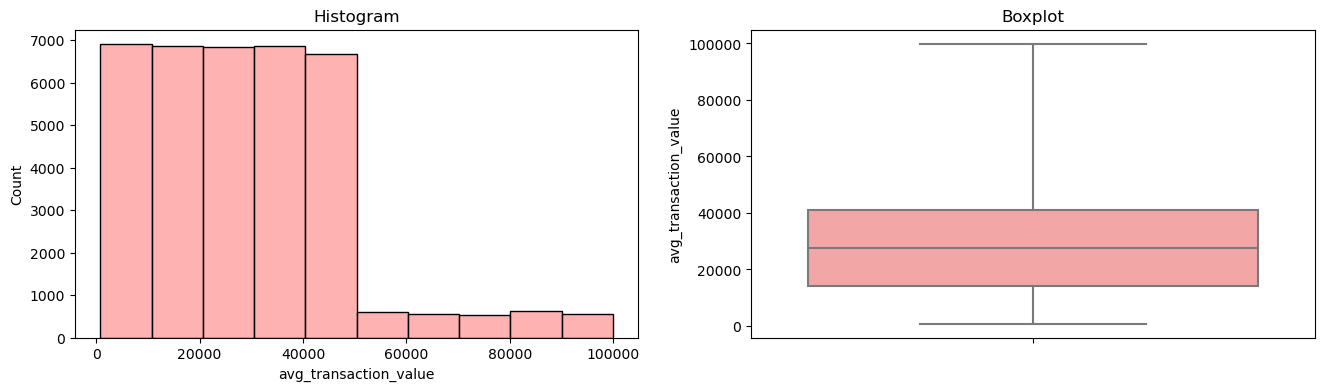


Skewness Value :  1.0110271627457472


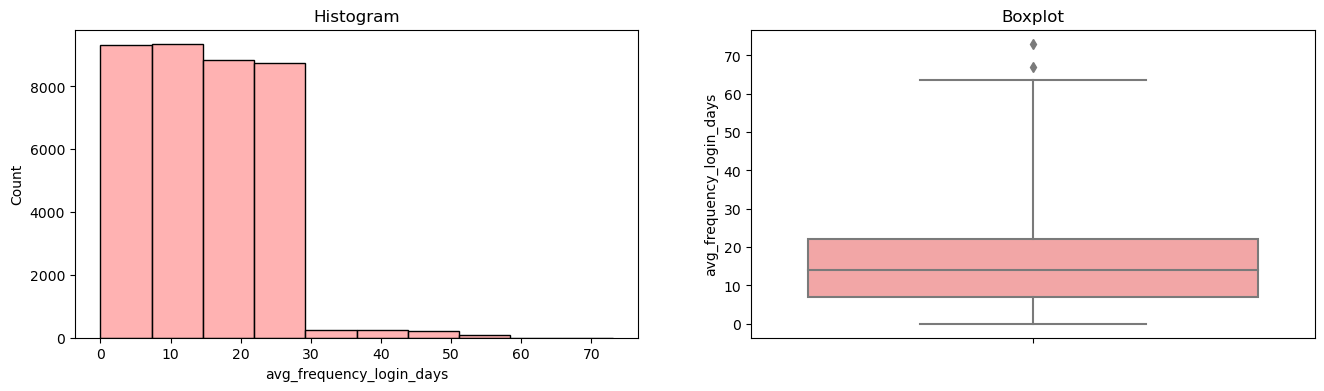


Skewness Value :  0.38986070002523915


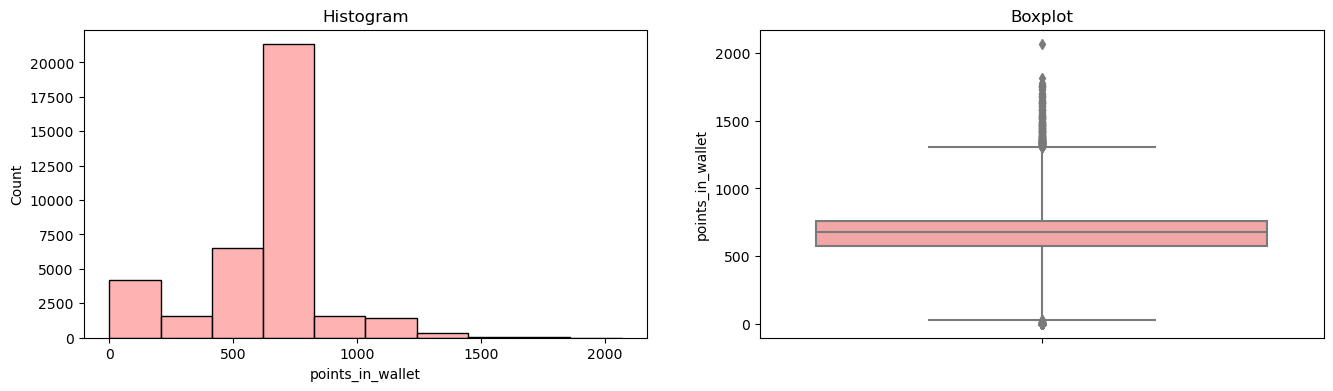


Skewness Value :  -0.7734917908458531


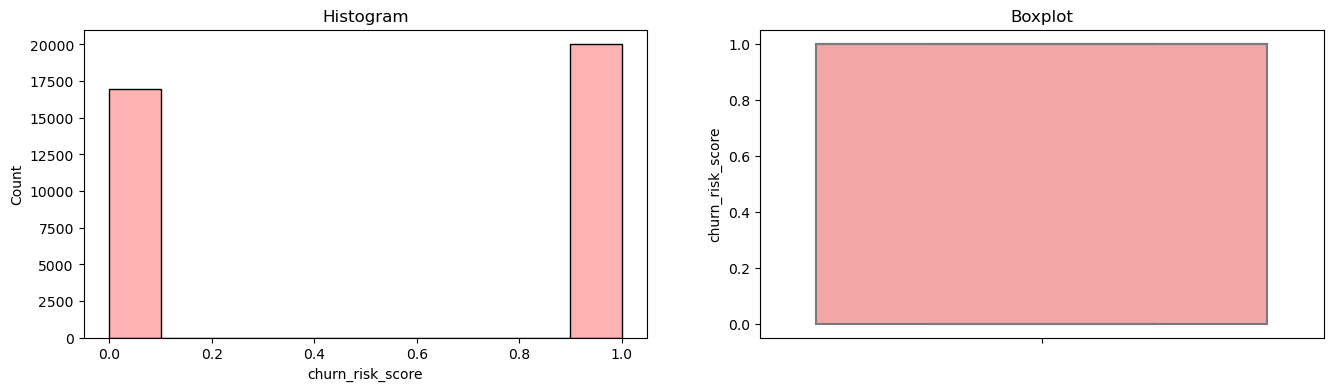


Skewness Value :  -0.16448743101696547


In [129]:
# plot histogram dan boxplot untuk melihat outlier
for col in num_columns:
    diagnostic_plots(df_clean, col)
    print('\nSkewness Value : ', df_clean[col].skew())

Berdasarkan nilai skewness di atas, kita dapat melihat bahwa:

- Skewness dari kolom age adalah -0.007, yang menunjukkan bahwa distribusi data hampir simetris atau mendekati normal.

- Skewness dari kolom days_since_last_login adalah 0.029, yang menunjukkan bahwa distribusi data mendekati normal.

- Skewness dari kolom avg_time_spent adalah 2.277, yang menunjukkan bahwa distribusi data sangat miring atau tidak simetris. Hal ini mungkin disebabkan oleh - adanya beberapa nilai yang sangat jauh dari rata-rata.

- skewness dari kolom avg_transaction_value adalah 1.011, yang menunjukkan bahwa distribusi data miring ke kanan atau memiliki ekor panjang di sisi kanan. - - Hal ini mungkin disebabkan oleh adanya beberapa nilai yang sangat besar.

- Skewness dari kolom avg_frequency_login_days adalah 0.390, yang menunjukkan bahwa distribusi data agak miring ke kanan.

- Skewness dari kolom points_in_wallet adalah -0.773, yang menunjukkan bahwa distribusi data miring ke kiri atau memiliki ekor panjang di sisi kiri. Hal ini mungkin disebabkan oleh adanya beberapa nilai yang sangat kecil.

In [130]:
df_clean[num_columns[:6]].describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet
count,36992.000000,34993.000000,36992.000000,36992.000000,36992.000000,36992.000000
mean,37.118161,12.758552,279.147450,29271.194003,14.658617,623.562421
std,15.867412,5.572600,329.947709,19444.806226,9.479184,270.263994
min,10.000000,1.000000,0.000000,800.460000,0.000000,0.000000
25%,23.000000,9.000000,60.102500,14177.540000,7.000000,574.135000
50%,37.000000,13.000000,161.765000,27554.485000,14.000000,680.370000
75%,51.000000,17.000000,356.515000,40855.110000,22.000000,757.002500
max,64.000000,26.000000,3235.578521,99914.050000,73.061995,2069.069761


sekilas dapat kita lihat bahwa:

- Nilai standar deviasi dari kolom 'age' cukup tinggi, sehingga dapat dikatakan distribusinya bervariasi.

- Nilai standar deviasi dari kolom 'days_since_last_login' relatif rendah, sehingga dapat dikatakan distribusinya cenderung konsisten.

- Rata-rata waktu yang dihabiskan pengguna di platform cukup rendah, bisa jadi disebabkan oleh ketidakpuasan pengguna terhadap layanan platform.

- Nilai standar deviasi dari kolom 'avg_transaction_value' cukup tinggi, sehingga dapat dikatakan distribusinya bervariasi.

- Rata-rata frekuensi login pengguna dalam sebulan cukup tinggi, menunjukkan pengguna aktif menggunakan platform ini.

- Nilai standar deviasi dari kolom 'points_in_wallet' cukup tinggi, sehingga dapat dikatakan distribusinya bervariasi.

# VI. Feature Engineering

## Feature Selection

#### Phi_K Correlation Test

Disini kami menggunakan Phi_K Correlation Test karena cocok digunakan dalam seleksi fitur dengan target churn_risk_score adalah karena target tersebut merupakan variabel diskrit dengan dua nilai, yaitu 0 dan 1.

In [131]:
dfcorr = df_clean.drop(columns=['joining_date','last_visit_time','user_id'],axis=1) # mengeliminasi kolom yang tidak perlu

interval columns not set, guessing: ['age', 'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet', 'churn_risk_score']


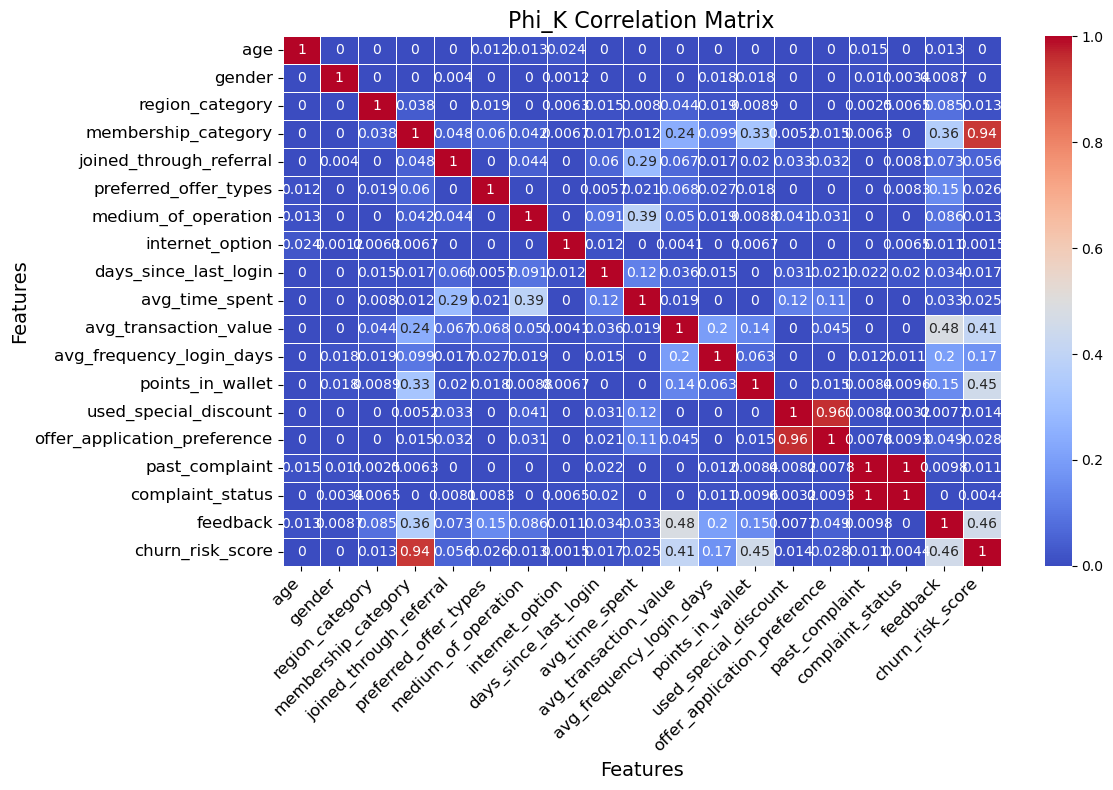

In [132]:
# Menghitung matriks phik
phik_matrix = dfcorr.phik_matrix()

# plot the correlation matrix using seaborn heatmap
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(phik_matrix, annot=True, cmap='coolwarm', linewidths=0.5, ax=ax)

# set the title and axis labels
plt.title("Phi_K Correlation Matrix", fontsize=16)
plt.xlabel("Features", fontsize=14)
plt.ylabel("Features", fontsize=14)

# rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# display the plot
plt.tight_layout()
plt.show()

In [133]:
# cek korelasi yang memiliki signifikansi terhadap churn_risk_score 
phik_overview = dfcorr.phik_matrix()
pd.set_option('display.max_columns', None)
phik_overview.loc[:,'churn_risk_score'].sort_values(ascending=False)

interval columns not set, guessing: ['age', 'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet', 'churn_risk_score']


churn_risk_score                1.000000
membership_category             0.942338
feedback                        0.455426
points_in_wallet                0.449504
avg_transaction_value           0.408713
avg_frequency_login_days        0.165154
joined_through_referral         0.055797
offer_application_preference    0.028171
preferred_offer_types           0.026127
avg_time_spent                  0.024576
days_since_last_login           0.017089
used_special_discount           0.014498
region_category                 0.013404
medium_of_operation             0.013098
past_complaint                  0.011308
complaint_status                0.004391
internet_option                 0.001486
gender                          0.000000
age                             0.000000
Name: churn_risk_score, dtype: float64

Dari output tersebut dapat diambil insight : 

- Membership category adalah fitur dengan korelasi tertinggi dengan churn_risk_score, dengan nilai korelasi sebesar 0.942338. Hal ini menunjukkan bahwa membership category dapat menjadi indikator yang kuat untuk memprediksi apakah seorang pelanggan akan churn atau tidak.

- Points_in_wallet adalah fitur dengan korelasi kedua tertinggi dengan churn_risk_score, dengan nilai korelasi sebesar 0.449504. Hal ini menunjukkan bahwa semakin banyak points_in_wallet seorang pelanggan, semakin kecil kemungkinannya untuk churn.

- Gender dan age tidak memiliki korelasi dengan churn_risk_score, dapat dilihat dari nilai korelasinya yang 0. Hal ini menunjukkan bahwa gender dan usia tidak secara signifikan mempengaruhi kemungkinan seorang pelanggan untuk churn.


Disini kita akan menggunakan threshold 0.1 untuk menentukan feature. 'membership_category', 'points_in_wallet', 'avg_transaction_value', 'feedback', 'avg_frequency_login_days' adalah kolom yang kita gunakan.

In [134]:
df_selected = df_clean[['membership_category', 'points_in_wallet', 'avg_transaction_value', 'feedback', 'avg_frequency_login_days','churn_risk_score']]
df_selected.head()

,membership_category,points_in_wallet,avg_transaction_value,feedback,avg_frequency_login_days,churn_risk_score
0,No Membership,627.48,38604.69,Poor Website,10.0,1
1,Basic Membership,575.97,7665.66,Poor Customer Service,17.0,1
2,Silver Membership,767.93,37671.69,Too many ads,5.0,0
3,No Membership,590.22,15678.14,Too many ads,11.0,1
4,Silver Membership,722.04,8422.68,Poor Product Quality,0.0,0


Selanjutnya kita akan memeriksa Cardinality.

## Handling Cardinality 

In [135]:
categorical = df_selected.select_dtypes(["category", "object"]).columns  # Check Cardinality

for i in df_selected[categorical]:
    print(f'{i} : {df_selected[categorical][i].unique()}')
    print(f'')
    print(f'{i} total unique values : {df_selected[categorical][i].nunique()}')
    print('=='*20)


membership_category : ['No Membership' 'Basic Membership' 'Silver Membership'
 'Premium Membership' 'Gold Membership' 'Platinum Membership']

membership_category total unique values : 6
feedback : ['Poor Website' 'Poor Customer Service' 'Too many ads'
 'Poor Product Quality' 'No reason specified' 'Products always in Stock'
 'Reasonable Price' 'Quality Customer Care' 'User Friendly Website']

feedback total unique values : 9


Sekilas dalam pengamatan kami Cardinalitynya masih tergolong normal.

## Data Preprosesing

In [136]:
df_selected.head(3) # Overview data

,membership_category,points_in_wallet,avg_transaction_value,feedback,avg_frequency_login_days,churn_risk_score
0,No Membership,627.48,38604.69,Poor Website,10.0,1
1,Basic Membership,575.97,7665.66,Poor Customer Service,17.0,1
2,Silver Membership,767.93,37671.69,Too many ads,5.0,0


In [137]:
print(df_selected.dtypes) # check data type

membership_category          object
points_in_wallet            float64
avg_transaction_value       float64
feedback                     object
avg_frequency_login_days    float64
churn_risk_score              int64
dtype: object


In [138]:
df_selected.columns # Check column

Index(['membership_category', 'points_in_wallet', 'avg_transaction_value',
       'feedback', 'avg_frequency_login_days', 'churn_risk_score'],
      dtype='object')

## Splitting between X (Features) and y (Target)

In [139]:
feature = ['membership_category', 'points_in_wallet', 'avg_transaction_value','feedback', 'avg_frequency_login_days']
target = ['churn_risk_score']

In [140]:
# Feature and target split
X = df_clean[feature]
y = df_clean[target]

In [141]:
# Split our data into train,val,test data.

X_train_full, X_test,  y_train_full, y_test = train_test_split(X,
                                                               y,
                                                               shuffle=True, test_size=0.2,
                                                               stratify=y, random_state=42
                                                               )

X_train, X_val, y_train, y_val = train_test_split(X_train_full,
                                                  y_train_full,
                                                  shuffle=True, 
                                                  train_size=0.8,
                                                  stratify=y_train_full,
                                                  random_state=42)

In [142]:
print('Train Size : ', X_train.shape)
print('Val size : ', X_val.shape)
print('Test Size  : ', X_test.shape)

Train Size :  (23674, 5)
Val size :  (5919, 5)
Test Size  :  (7399, 5)


In [143]:
X_train.head() #overview X_train

,membership_category,points_in_wallet,avg_transaction_value,feedback,avg_frequency_login_days
11809,Gold Membership,417.910207,70771.73,Quality Customer Care,0.0
16365,No Membership,627.220000,13477.46,Poor Product Quality,21.0
2742,No Membership,620.380000,11372.38,Poor Website,0.0
18391,No Membership,712.400000,18390.76,No reason specified,27.0
5016,No Membership,930.715919,9472.79,No reason specified,9.0


In [144]:
X_test.head() #Overview X_test

,membership_category,points_in_wallet,avg_transaction_value,feedback,avg_frequency_login_days
2294,Platinum Membership,0.000000,2278.12,Quality Customer Care,12.0
29325,Basic Membership,289.209155,1419.10,Too many ads,10.0
6850,Platinum Membership,739.950000,20534.97,Poor Website,5.0
21628,No Membership,0.000000,45178.01,Too many ads,15.0
29626,Premium Membership,779.790000,26618.79,Too many ads,27.0


In [145]:
X_val #Overview X_val

,membership_category,points_in_wallet,avg_transaction_value,feedback,avg_frequency_login_days
9697,No Membership,0.000000,11738.76,Poor Product Quality,0.000000
24122,Gold Membership,748.320000,44868.99,Poor Customer Service,0.000000
5216,Basic Membership,624.370000,46523.15,Poor Website,5.000000
26655,Gold Membership,306.123627,16027.19,No reason specified,24.000000
25870,No Membership,654.270000,41953.15,Poor Product Quality,5.000000
...,...,...,...,...,...
5065,Basic Membership,1198.469708,1775.41,Poor Customer Service,51.769912
32232,Premium Membership,1263.388414,12954.19,No reason specified,21.000000
11065,Gold Membership,786.550000,39572.22,Poor Customer Service,12.000000
30162,Gold Membership,773.860000,36422.68,Poor Product Quality,22.000000


In [146]:
y_train.head() # Overview y_train

,churn_risk_score
11809,0
16365,1
2742,1
18391,1
5016,1


## Handling Missing Value

Dalam tahap ini kita akan memeriksa missing value pada fitur yang kita gunakan.

In [147]:
# checking missing values in our train, val, and test set
datasets = [X_train, X_test, X_val]
dataset_names = ['X_train', 'X_test', 'X_val']

for data, name in zip(datasets, dataset_names):
    print(f"Number of missing values in {name}: {data.isnull().sum().sum()}")

Number of missing values in X_train: 0
Number of missing values in X_test: 0
Number of missing values in X_val: 0


Disini dapat kita lihat bahwa dalam fitur yang kita gunakan tidak terdapat missing value.

## Handling Outlier

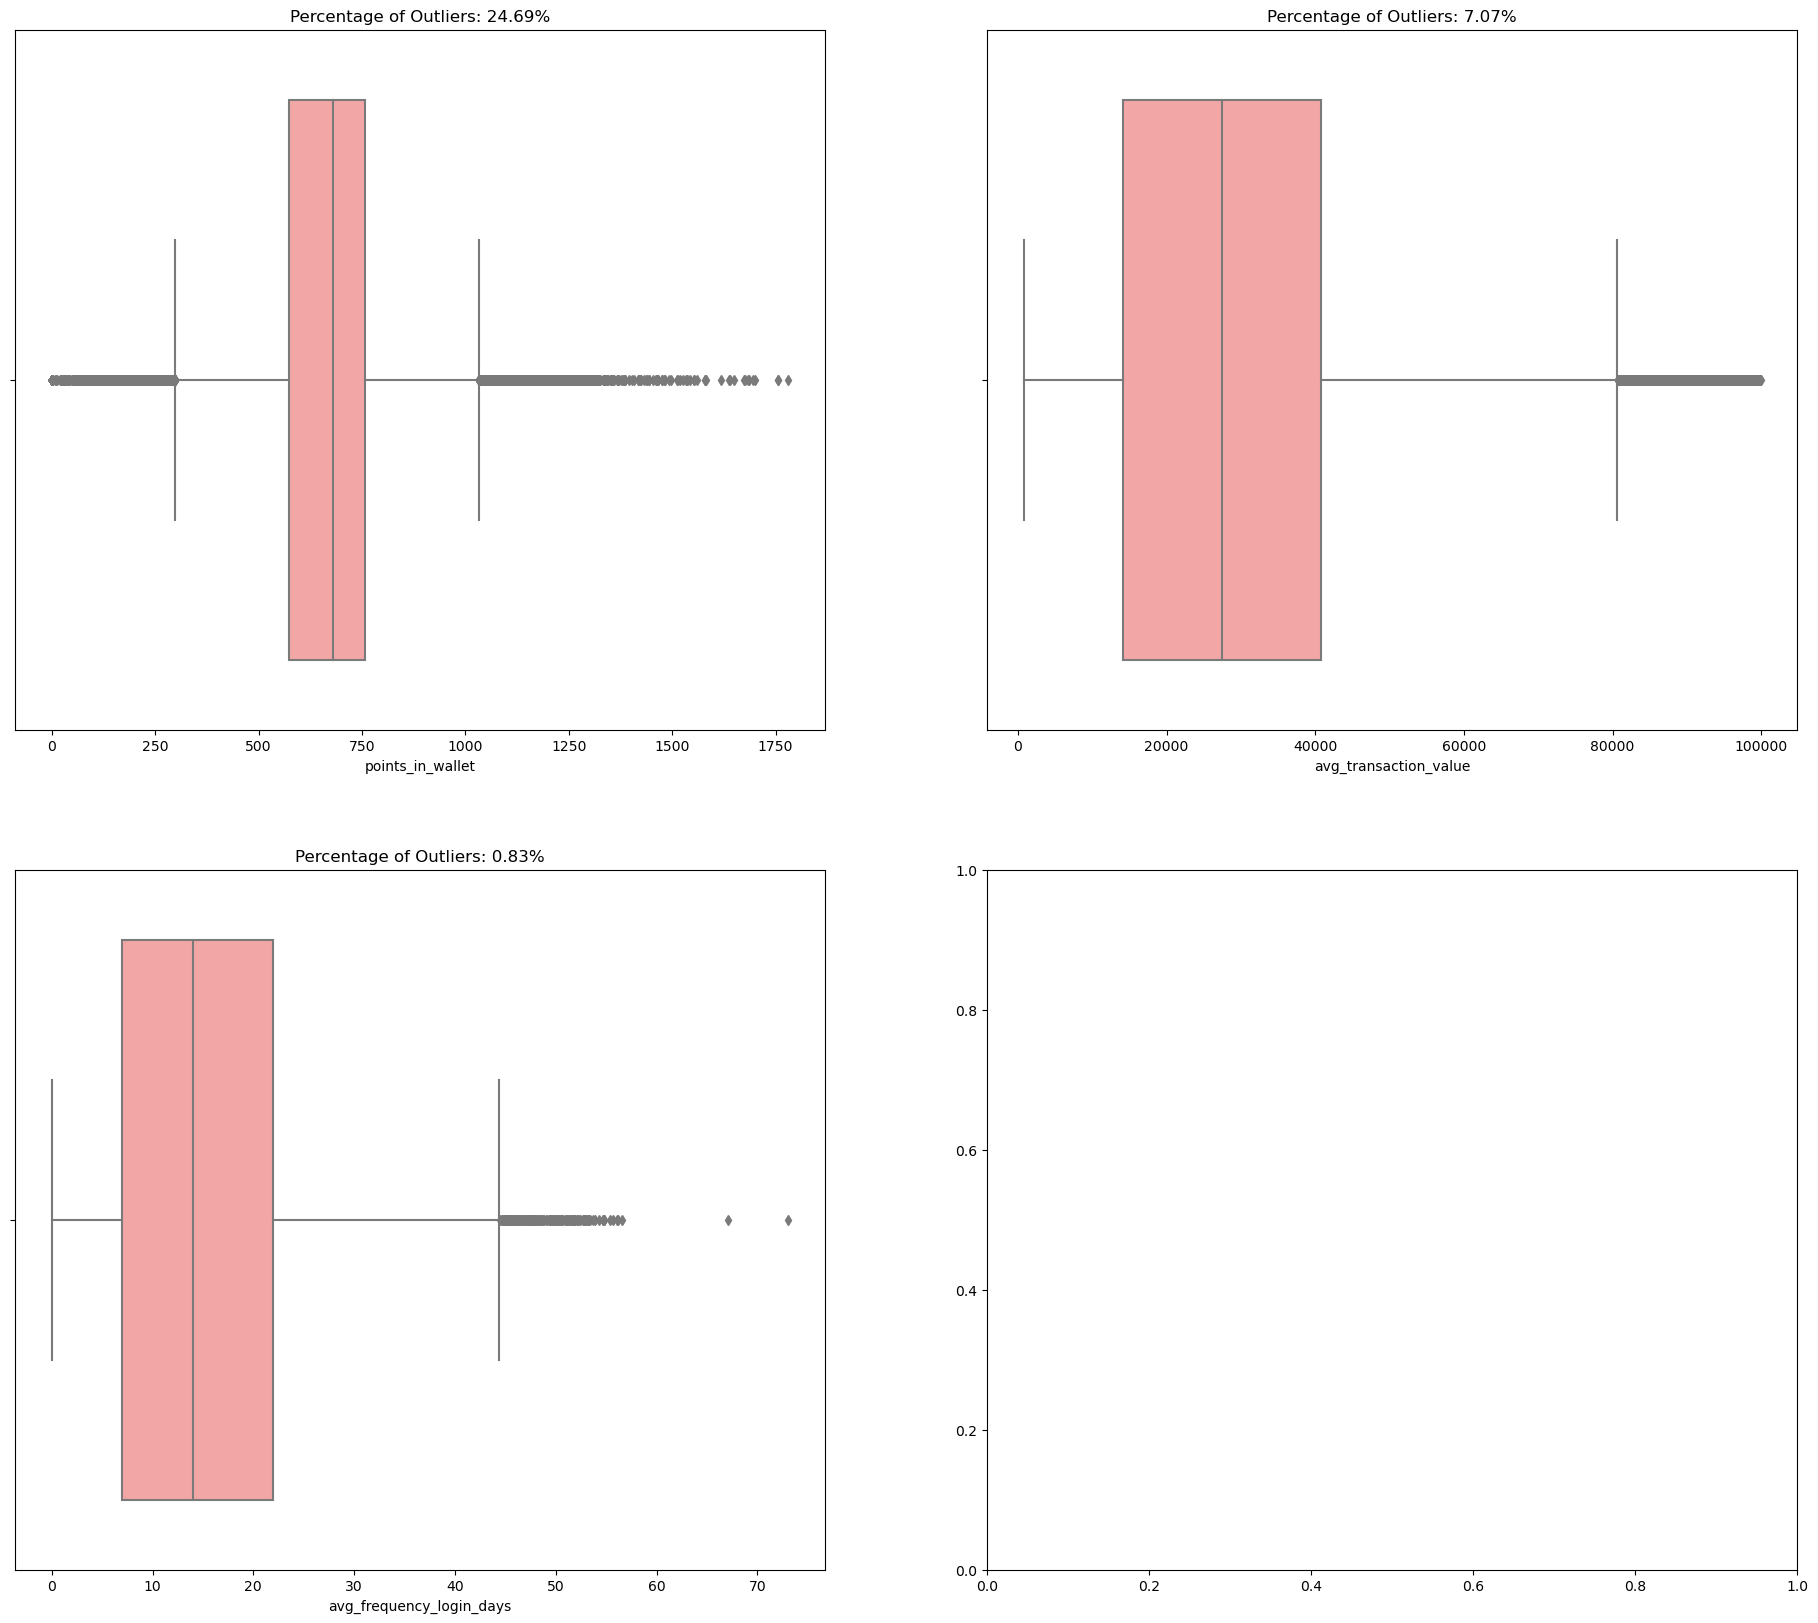

In [148]:
num_cols = X_train.select_dtypes(include=np.number).columns.tolist()

# Defining function for outlier analysis.
def outlier_analysis(data,col):
    skewness = data[col].skew()
    if skewness >= -0.5 and skewness <= 0.5:
        upper = data[col].mean() + 3*data[col].std()
        lower = data[col].mean() - 3*data[col].std()
    else:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        upper = Q1 + 1.5*IQR
        lower = Q3 - 1.5*IQR

    no_outliers = data[(data[col] >= lower) & (data[col] <= upper)]
    outliers = data[(data[col] < lower) | (data[col] > upper)]

    return outliers, upper, lower

fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(23, 20))
x = 0
for i in range(2):
    for j in range(3):
        try:
            out, up, low = outlier_analysis(X_train, num_cols[x])
            sns.boxplot(X_train[num_cols[x]], ax=ax[i][j])
            ax[i][j].set_title('Percentage of Outliers: {:.2f}%'.format(len(out)*100/len(X_train)))
            x += 1
        except:
            pass
plt.show()


- Dari boxplot tersebut, kita mengetahui bahwa ada 3 kolom tersebut memiliki outlier, Kami akan menangani 3 kolom ini menggunakan transformasi boxcox

- Box-Cox adalah teknik transformasi data yang digunakan untuk membuat distribusi data yang tidak normal menjadi lebih normal. Transformasi ini berguna dalam analisis regresi dan memungkinkan asumsi dari regresi linier terpenuhi.

Transformasi Box-Cox adalah transformasi parameter yang memungkinkan data untuk diubah ke dalam bentuk normal. Transformasi ini melibatkan penghitungan koefisien Box-Cox, lambda, yang memaksimalkan normalitas data yang diubah dengan menggeser dan mereskalakan data asli. Transformasi Box-Cox dapat diterapkan pada data numerik positif dan nol, dan dapat digunakan untuk mengurangi outlier serta mengatasi masalah heteroskedastisitas dan skewness.

Kelebihan dari Box-Cox transformation adalah:

- Mampu mengatasi data yang tidak terdistribusi normal dan membuatnya lebih mirip dengan distribusi normal.

- Mampu meningkatkan performa model dengan mengurangi variansi dari data dan memperbaiki homogenitas variansi antar kelompok.

Namun, ada juga beberapa kekurangan dari Box-Cox transformation, yaitu:

- Memerlukan perhitungan logaritma dan pembagian, sehingga tidak dapat digunakan pada data dengan nilai nol atau negatif.

- Penggunaan parameter lambda memerlukan tuning dan pemilihan yang tepat untuk mencapai hasil optimal.

- Box-Cox transformation hanya cocok untuk data numerik dan tidak dapat digunakan untuk data kategori atau ordinal.

Tetapi karena kolom ini berisi nilai nol, kita perlu mengubahnya menjadi nilai kecil mendekati nol seperti 0,00001 sehingga Box-Cox dapat bekerja dengan kolom ini. Kami akan melakukan ini secara bersamaan nanti menggunakan  column transformer.

## Column Transforming

Pada bagian ini, kita ingin melakukan transformasi pada data sebelum memasukkannya ke dalam model. Terdapat fitur yang memiliki outlier, sehingga perlu dilakukan transformasi untuk mengurangi dampak outlier tersebut pada model. Salah satu cara untuk mengurangi dampak outlier adalah dengan menggunakan teknik Box-Cox transformation.

Namun sebelum melakukan transformasi, terdapat nilai 0 pada fitur numerik yang perlu diperhatikan. Karena nilai 0 tidak dapat digunakan dalam Box-Cox transformation, maka nilai 0 tersebut perlu diganti dengan nilai yang lebih besar dari 0, dalam hal ini digunakan nilai 0.00001. Setelah itu, kita akan membuat sebuah pipeline untuk mentransformasi data, yang akan dilakukan dengan menggunakan teknik Box-Cox transformation.

In [149]:
# replace zeros function
def replace_zeros(X):
    return np.where(X == 0, 0.00001, X)

# columns that have outliers
col_rz = ['points_in_wallet','avg_transaction_value', 'avg_frequency_login_days']

# replacing 0 on the 3 columns
dataframes = [X_train, X_val, X_test]
for df in dataframes:
    df[col_rz] = df[col_rz].apply(replace_zeros)

In [150]:
# numerical features tansformer
numeric_features = X_train.select_dtypes(include=np.number).columns.tolist()
numeric_transformer = Pipeline(
    steps=[('boxcox', BoxCoxTransformer(variables = ['points_in_wallet','avg_transaction_value', 'avg_frequency_login_days'])), ("scaler", StandardScaler())]
)

# onehot features transformer
ohe_features = X_train.select_dtypes(include=['object']).columns.tolist()
ohe_transformer = OrdinalEncoder() 

# ordinal features transformer
ordinal_features = X_train.select_dtypes(include=['object']).columns.tolist()
ord_transformer = OrdinalEncoder() 

# defining the columns transformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("ord",ord_transformer,ordinal_features)
    ], remainder='passthrough' 
)

Selanjutnya, kami akan mentransformasi data train, val, dan test kami.

In [151]:
# transforming the X_train, X_val, and X_test

X_train_final = preprocessor.fit_transform(X_train)     
X_val_final = preprocessor.transform(X_val)
X_test_final = preprocessor.transform(X_test)

Kemudian kita akan memeriksa atau memastikan data train, val, dan test kami.

In [152]:
# showing transformed X_train
X_train_final

array([[-0.32180937,  1.77626814, -2.31624801,  1.        ,  5.        ],
       [ 0.19668476, -0.75046259,  0.66497824,  2.        ,  2.        ],
       [ 0.18133687, -0.91472751, -2.31624801,  2.        ,  3.        ],
       ...,
       [ 0.36913048, -0.8721153 , -0.29805241,  3.        ,  2.        ],
       [ 0.42609113,  0.15644856, -0.40419207,  1.        ,  3.        ],
       [ 0.36334767,  0.60380284, -0.02064111,  1.        ,  7.        ]])

In [153]:
# showing transformed X_val
X_val_final

array([[-2.77423444, -0.88504488, -2.31624801,  2.        ,  2.        ],
       [ 0.4550378 ,  0.87646305, -2.31624801,  1.        ,  1.        ],
       [ 0.1903006 ,  0.94111507, -0.64764183,  0.        ,  3.        ],
       ...,
       [ 0.5319396 ,  0.66046877,  0.06155419,  1.        ,  1.        ],
       [ 0.50663619,  0.52469539,  0.72153471,  1.        ,  2.        ],
       [ 0.16983506,  0.40845553,  0.66497824,  2.        ,  3.        ]])

In [154]:
# showing transformed X_test
X_test_final

array([[-2.77423444, -1.96324955,  0.06155419,  3.        ,  5.        ],
       [-0.7132481 , -2.14851725, -0.10743033,  0.        ,  7.        ],
       [ 0.43792624, -0.28186151, -0.64764183,  3.        ,  3.        ],
       ...,
       [ 0.86396747,  0.72217082, -2.31624801,  2.        ,  7.        ],
       [ 0.3555272 ,  0.31509113,  0.21443746,  5.        ,  2.        ],
       [ 0.40621507,  0.09477355,  1.03233484,  1.        ,  0.        ]])

In [155]:
# Putting the transformed data inside dataframe

X_train_final_df = pd.DataFrame(X_train_final,columns=numeric_features+ordinal_features)
X_train_final_df

,points_in_wallet,avg_transaction_value,avg_frequency_login_days,membership_category,feedback
0,-0.321809,1.776268,-2.316248,1.0,5.0
1,0.196685,-0.750463,0.664978,2.0,2.0
2,0.181337,-0.914728,-2.316248,2.0,3.0
3,0.380870,-0.413674,0.983511,2.0,0.0
4,0.805489,-1.077457,-0.199572,2.0,0.0
...,...,...,...,...,...
23669,0.386387,-0.898377,0.830206,1.0,1.0
23670,0.520103,-1.896588,-2.316248,5.0,3.0
23671,0.369130,-0.872115,-0.298052,3.0,2.0
23672,0.426091,0.156449,-0.404192,1.0,3.0


Terlihat data yang kita punya sudah sesuai, selanjutnya kita akan memeriksa multicollinearity pada data yang kita punya dengan metode VIF.

## Check Multikolinearity (VIF)

- VIF (Variance Inflation Factor) digunakan untuk mengevaluasi multicollinearity atau adanya ketergantungan antara variabel-variabel independen dalam model regresi. Jika terdapat multicollinearity, maka koefisien regresi yang diperoleh dapat menjadi tidak stabil dan sulit untuk diinterpretasikan.

In [156]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns.to_list()
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

calc_vif(X_train_final_df)

,variables,VIF
0,points_in_wallet,1.003448
1,avg_transaction_value,1.017002
2,avg_frequency_login_days,1.007952
3,membership_category,1.702724
4,feedback,1.718366


- Hasil analisa menunjukkan nilai Variance Inflation Factor (VIF) yaitu kurang dari 2. Hal ini menunjukkan tidak adanya masalah multikolinearitas dalam data. 

## Tensor Flow Pepiline

Pada bagian ini, dilakukan pengolahan data agar dapat digunakan untuk pelatihan model deep learning menggunakan TensorFlow. Untuk data Train, dilakukan pengaturan buffer sebesar 20000 untuk mendapatkan data acak yang lebih baik. Buffer digunakan untuk mengambil sampel acak dari data yang lebih besar dan memuatnya ke dalam memori yang lebih kecil. Dengan ukuran buffer yang lebih besar, data yang diambil akan lebih acak, sehingga dapat memperbaiki kinerja model dalam pelatihan.

Selain itu, dilakukan pengaturan ukuran batch untuk setiap set sebesar 256. Batch adalah jumlah sampel data yang diberikan ke model pada setiap iterasi pelatihan. Penggunaan batch ini dapat meningkatkan kecepatan pelatihan model karena model tidak perlu memproses semua data sekaligus. Dengan memberikan data dalam batch, model dapat menyesuaikan bobot dan bias dengan lebih cepat dan efisien.

In [157]:
# tensorflow pipeline data train
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_final,y_train))
train_dataset = train_dataset.shuffle(buffer_size=20000).batch(256)

# tensorflow pipeline data val
val_dataset = tf.data.Dataset.from_tensor_slices((X_val_final,y_val))
val_dataset = val_dataset.batch(256)

# tensorflow pipeline data test
test_dataset = tf.data.Dataset.from_tensor_slices((X_test_final,y_test))
test_dataset = test_dataset.batch(256)

# VII. Model Definition

Disini kita akan membuat model ANN (Artifical Neural Network) dengan menggunakan Sequential API dan Functional API.

- ANN (Artificial Neural Network) adalah suatu metode pemodelan machine learning yang terinspirasi dari struktur dan cara kerja jaringan saraf manusia. ANN terdiri dari banyak unit pemrosesan sederhana yang disebut neuron yang saling terhubung dan membentuk jaringan.

Dalam implementasinya, ANN dapat dibangun menggunakan dua metode yaitu Sequential API dan Functional API pada library Keras. Kedua metode ini memungkinkan kita untuk membuat jaringan saraf dengan konfigurasi layer yang berbeda-beda.

- Sequential API adalah metode yang paling sederhana untuk membangun jaringan saraf. Model Sequential terdiri dari beberapa layer yang ditambahkan secara berurutan. Setiap layer memiliki tipe dan jumlah neuron yang dapat dikonfigurasi. Cara kerja Sequential API adalah setiap output dari layer sebelumnya dihubungkan secara langsung ke input layer berikutnya.

- Functional API adalah metode yang lebih fleksibel dibandingkan dengan Sequential API. Metode ini memungkinkan kita untuk membuat model dengan arsitektur yang lebih kompleks dan memiliki beberapa input dan output. Cara kerja Functional API adalah setiap layer didefinisikan secara terpisah, kemudian dihubungkan secara manual menggunakan operator layer.

Dalam kedua metode Sequential dan Functional API, kita dapat menentukan berbagai jenis layer seperti Dense layer, Convolutional layer, dan Recurrent layer. Selain itu, kita juga dapat menentukan berbagai hyperparameter seperti learning rate, jumlah epoch, batch size, dan sebagainya.

# VIII. Model Training

Pada bagian ini dilakukan perhitungan untuk menentukan jumlah neuron pada hidden layer untuk model neural network yang akan dilatih. Jumlah neuron pada hidden layer dapat mempengaruhi kinerja model dan perlu ditentukan secara hati-hati. Dalam kasus ini, rumus yang digunakan untuk menghitung jumlah neuron pada hidden layer adalah menggunakan algoritma empiris yaitu rumus Heaton.

Pada code, nilai alpha (alp) yang digunakan adalah 10. Kemudian nilai jumlah input layer (inp) adalah jumlah fitur pada data X_train. Nilai output layer (out) adalah 1, karena ini adalah model regresi. Berdasarkan rumus Heaton, jumlah neuron pada hidden layer (hid) dihitung dengan rumus:

$$ hid = \frac{\alpha \cdot (i+o)}{n} $$


dimana n adalah jumlah data pada X_train, i adalah jumlah fitur pada X_train dan o adalah jumlah output.

In [158]:
# calculating hidden layer neuron for the first trial

alp = 10
inp = X_train.shape[1]
out = 1
hid = int(len(X_train)/(alp*(inp+out)))
hid2 = int(hid/3)
print(f'hidden layer 1 neurons: {hid}')
print(f'hidden layer 2 neurons: {hid2}')

hidden layer 1 neurons: 394
hidden layer 2 neurons: 131


Hasil perhitungan menunjukkan bahwa jumlah neuron pada hidden layer pertama adalah 394, sedangkan jumlah neuron pada hidden layer kedua adalah 131. Jumlah neuron pada hidden layer ini akan digunakan dalam pembentukan arsitektur.

## Sequential

Pada model sequential, kita akan membuat jaringan saraf dengan urutan lapisan-lapisan yang terhubung secara berurutan. Pada kasus ini, kita akan menetapkan 2 hidden layer dengan menggunakan jumlah neuron yang telah dihitung di awal.

Untuk masing-masing lapisan, kita akan mengatur parameter tertentu. Pada tiga lapisan pertama, kita akan menggunakan fungsi aktivasi relu dan penginisialisasi kernel HeNormal. Fungsi aktivasi relu digunakan untuk menghilangkan nilai negatif dan meninggalkan nilai positif dalam jaringan. Penginisialisasi kernel HeNormal akan memastikan bahwa bobot awal dalam jaringan terdistribusi dengan baik.

Selain itu, pada lapisan input, kita akan menambahkan regularizer kernel 'l2'. Regularisasi kernel digunakan untuk membatasi kompleksitas jaringan dengan menambahkan biaya tambahan ke fungsi loss. Regularisasi kernel 'l2' akan menambahkan biaya berdasarkan norma kuadrat dari bobot dan memaksa jaringan untuk menggunakan bobot yang lebih kecil. Hal ini dapat membantu mencegah overfitting pada jaringan.

- ReLU (Rectified Linear Unit) adalah fungsi aktivasi yang digunakan pada jaringan saraf tiruan (neural network) yang paling umum. Fungsi ini menghasilkan nilai nol untuk semua nilai input negatif, dan nilai input positif akan dilewatkan ke output tanpa perubahan. Secara matematis, fungsi ReLU didefinisikan sebagai f(x) = max(0, x).

- Sementara itu, HeNormal adalah salah satu teknik inisialisasi bobot (weight initialization) pada jaringan saraf tiruan yang populer. Teknik ini memperhitungkan distribusi normal standar yang dikalikan dengan akar dari jumlah input pada lapisan saat itu. Teknik inisialisasi bobot yang tepat dapat membantu model mencapai hasil yang lebih baik dengan lebih cepat dan stabil pada pelatihan.

In [159]:
# Define Sequential Model's Architecture

model_s1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(inp, activation='relu', input_shape=(inp,),kernel_initializer='HeNormal',kernel_regularizer='l2'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(hid, activation='relu',kernel_initializer='HeNormal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(hid2, activation='relu',kernel_initializer='HeNormal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(out, activation='sigmoid')
])

Setelah menentukan arsitektur model, langkah selanjutnya adalah mengkompilasi model. Proses kompilasi bertujuan untuk mengatur beberapa parameter tambahan pada model, seperti optimizer, loss function, dan metrics.

- RMSprop adalah algoritma optimisasi yang populer digunakan dalam deep learning. Loss function yang digunakan adalah BinaryCrossentropy. 

- BinaryCrossentropy biasanya digunakan untuk permasalahan klasifikasi biner. 

- Metrics yang digunakan adalah accuracy, yang akan digunakan untuk mengevaluasi performa model.

Dengan mengkompilasi model dengan parameter-parameter tersebut, model siap dilatih pada data yang ada.

In [160]:
# Define Training Configuration (Optimizer, Loss, Metrics)

model_s1.compile(
    # Optimizer
    optimizer=tf.keras.optimizers.RMSprop(),
    
    # Loss function to minimize
    loss=tf.keras.losses.BinaryCrossentropy(),
    
    # List of metrics to monitor
    metrics=['accuracy'],
)

Pada bagian ini, setelah selesai mendefinisikan model dan menyusun layer pada model, kita akan mengeksekusi method summary() pada model yang telah dibuat untuk menampilkan ringkasan model tersebut. Ringkasan model akan menampilkan daftar layer, tipe layer, jumlah parameter, serta output shape pada setiap layer yang ada di dalam model tersebut.

Ringkasan model sangat berguna untuk memeriksa apakah model yang telah dibuat sudah sesuai dengan apa yang diinginkan, apakah layer-layer sudah disusun dengan benar dan apakah model terlalu kompleks atau terlalu sederhana. Dengan melihat ringkasan model, kita dapat mengidentifikasi masalah pada arsitektur model sebelum dilakukan pelatihan (training) dan menyesuaikan layer atau parameter yang perlu diperbaiki.

In [161]:
# sequential model summary
model_s1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 5)                 30        
                                                                 
 batch_normalization_5 (Batc  (None, 5)                20        
 hNormalization)                                                 
                                                                 
 dense_16 (Dense)            (None, 394)               2364      
                                                                 
 batch_normalization_6 (Batc  (None, 394)              1576      
 hNormalization)                                                 
                                                                 
 dense_17 (Dense)            (None, 131)               51745     
                                                                 
 batch_normalization_7 (Batc  (None, 131)             

kemudian model yang telah didefinisikan dan disusun akan di-training menggunakan data train dan validasi (val). Tujuannya adalah untuk menemukan nilai bobot (weight) dan bias yang optimal, sehingga model dapat melakukan prediksi dengan akurasi yang tinggi.

Training dilakukan dengan cara memperbarui bobot dan bias pada setiap iterasi berdasarkan perbedaan antara output model dengan nilai target. Proses ini menggunakan algoritma backpropagation, yang menghitung gradien dari fungsi loss function terhadap bobot dan bias, dan kemudian memperbarui nilai bobot dan bias tersebut berdasarkan gradien yang telah dihitung.

Pada akhir setiap epoch, model akan dievaluasi menggunakan data validasi. Hal ini dilakukan untuk menghindari overfitting, yaitu kondisi di mana model telah "menghafal" data training dan tidak mampu melakukan generalisasi pada data yang belum pernah dilihat sebelumnya. Dengan melakukan evaluasi pada data validasi, kita dapat mengetahui apakah model telah mempelajari pola yang umum dari data, atau hanya mempelajari pola spesifik dari data training saja.

In [162]:
# sequential model training
history_s1 = model_s1.fit(train_dataset,epochs=50,validation_data=val_dataset)

Epoch 1/50
93/93 [==============================] - 1s 5ms/step - loss: 0.6612 - accuracy: 0.6652 - val_loss: 0.6859 - val_accuracy: 0.6586
Epoch 2/50
93/93 [==============================] - 0s 3ms/step - loss: 0.5973 - accuracy: 0.7111 - val_loss: 0.7313 - val_accuracy: 0.6455
Epoch 3/50
93/93 [==============================] - 0s 3ms/step - loss: 0.5552 - accuracy: 0.7311 - val_loss: 0.5763 - val_accuracy: 0.7087
Epoch 4/50
93/93 [==============================] - 0s 3ms/step - loss: 0.5212 - accuracy: 0.7485 - val_loss: 0.5420 - val_accuracy: 0.7498
Epoch 5/50
93/93 [==============================] - 0s 3ms/step - loss: 0.4965 - accuracy: 0.7613 - val_loss: 0.4975 - val_accuracy: 0.7696
Epoch 6/50
93/93 [==============================] - 0s 3ms/step - loss: 0.4736 - accuracy: 0.7778 - val_loss: 0.4793 - val_accuracy: 0.7657
Epoch 7/50
93/93 [==============================] - 0s 3ms/step - loss: 0.4535 - accuracy: 0.7942 - val_loss: 0.4480 - val_accuracy: 0.7969
Epoch 8/50
93/93 [==

Model di atas adalah sebuah model deep learning yang menggunakan neural network untuk melakukan klasifikasi. Terdapat 50 epoch pada model tersebut dengan nilai loss dan akurasi untuk setiap epoch.

Pada setiap epoch, model dilatih pada data latih (train) dan data validasi (val) yang digunakan untuk menghitung loss dan akurasi. Dalam hal ini, loss mengukur seberapa jauh prediksi model dari nilai sebenarnya, sedangkan akurasi mengukur seberapa akurat model dalam memprediksi target.

Dari output di atas, kita dapat melihat bahwa nilai loss semakin menurun pada setiap epoch, sedangkan akurasi semakin meningkat. Ini menunjukkan bahwa model semakin baik dalam memprediksi target dengan setiap epoch. Namun, terdapat kasus ketika nilai loss meningkat pada beberapa epoch, hal ini bisa terjadi karena adanya overfitting pada model.

Secara keseluruhan, model ini terlihat cukup baik karena berhasil mencapai akurasi yang tinggi pada data validasi (val_accuracy = 0.8892) dan tidak ada tanda-tanda overfitting yang serius pada model. Namun, untuk mengevaluasi model secara lebih tepat, perlu dilakukan evaluasi lebih lanjut seperti memeriksa kinerja pada data uji.

## Functional Model

Selanjutnya kita akan membuatan model dengan menggunakan API fungsional yang tersedia pada TensorFlow. Dalam pembuatan model fungsional ini, akan ditetapkan 3 lapisan tersembunyi dengan jumlah neuron yang telah dihitung sebelumnya. Ketiga lapisan ini akan digabungkan dengan lapisan masukan pada model.

Selanjutnya, pada setiap lapisan akan diatur parameter tertentu. Pada 3 lapisan pertama, fungsi aktivasi yang digunakan adalah relu dan penginisialisasi kernel menggunakan HeNormal. Fungsi aktivasi relu digunakan untuk mengaktifkan output positif dari neuron, sedangkan penginisialisasi kernel HeNormal adalah suatu teknik untuk menginisialisasi bobot (weight) secara acak dalam jangkauan yang tepat untuk mempercepat konvergensi model.

Selain itu, regularizer kernel 'l2' juga ditambahkan pada lapisan masukan. Regularizer ini bertujuan untuk mengurangi overfitting pada model dengan menambahkan penalitas pada bobot (weight) yang besar. Dengan demikian, model yang dihasilkan diharapkan lebih baik dalam melakukan generalisasi pada data baru dan tidak hanya menghafal data latih.

In [163]:
# Define Functional Model's Architecture

input_lyr = tf.keras.layers.Input(shape=(inp,))
hidden1 = tf.keras.layers.Dense(inp, activation='relu',kernel_initializer='HeNormal',kernel_regularizer='l2')(input_lyr)
normal1 = tf.keras.layers.BatchNormalization()(hidden1)
hidden2 = tf.keras.layers.Dense(hid,activation='relu',kernel_initializer='HeNormal')(normal1)
concat = tf.keras.layers.concatenate([input_lyr,hidden2])
normal2 = tf.keras.layers.BatchNormalization()(concat)
hidden3 = tf.keras.layers.Dense(hid2,activation='relu',kernel_initializer='HeNormal')(normal2)
output = tf.keras.layers.Dense(out,activation='sigmoid')(hidden3)

model_f1 = tf.keras.models.Model(inputs=input_lyr,outputs=output)

Setelah menentukan arsitektur model, kami akan mengkompilasi model kami menggunakan RMSprop, loss function BinaryCrossentropy, dan metrics accuracy.

In [164]:
# Define Training Configuration (Optimizer, Loss, Metrics)

model_f1.compile(
    # Optimizer
    optimizer=tf.keras.optimizers.RMSprop(),
    
    # Loss function to minimize
    loss=tf.keras.losses.BinaryCrossentropy(),
    
    # List of metrics to monitor
    metrics=['accuracy'],
)

Setelah mendefinisikan dan menyusun model kita, kita dapat melihat ringkasan model kita untuk melihat bentuk dan parameter yang tersedia di setiap layer.

In [165]:
# functional model summary
model_f1.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 5)]          0           []                               
                                                                                                  
 dense_19 (Dense)               (None, 5)            30          ['input_3[0][0]']                
                                                                                                  
 batch_normalization_8 (BatchNo  (None, 5)           20          ['dense_19[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 dense_20 (Dense)               (None, 394)          2364        ['batch_normalization_8[0][

Dari ringkasan model di atas, kita dapat melihat bahwa model terdiri dari 5 lapisan, yaitu lapisan input, 2 lapisan Dense, 2 lapisan normalisasi batch, dan 1 lapisan konkatenasi. Total parameter yang ada pada model ini adalah 56.542, dengan parameter yang dapat dilatih sebanyak 55.734. Hal ini menunjukkan bahwa model ini cukup kompleks dan memiliki kemampuan untuk mempelajari fitur yang rumit dari data pelatihan.

Setelah model kita siap, kita akan melatih model kita menggunakan  train dan val dataset.

In [166]:
# training functional model with callback
history_f1 = model_f1.fit(train_dataset, epochs=50, validation_data=val_dataset)

Epoch 1/50
93/93 [==============================] - 1s 4ms/step - loss: 0.6295 - accuracy: 0.7341 - val_loss: 0.6996 - val_accuracy: 0.6300
Epoch 2/50
93/93 [==============================] - 0s 3ms/step - loss: 0.5369 - accuracy: 0.7865 - val_loss: 0.5956 - val_accuracy: 0.7091
Epoch 3/50
93/93 [==============================] - 0s 3ms/step - loss: 0.4876 - accuracy: 0.8047 - val_loss: 0.5050 - val_accuracy: 0.7908
Epoch 4/50
93/93 [==============================] - 0s 3ms/step - loss: 0.4385 - accuracy: 0.8181 - val_loss: 0.4238 - val_accuracy: 0.8199
Epoch 5/50
93/93 [==============================] - 0s 3ms/step - loss: 0.3978 - accuracy: 0.8269 - val_loss: 0.3990 - val_accuracy: 0.8250
Epoch 6/50
93/93 [==============================] - 0s 3ms/step - loss: 0.3812 - accuracy: 0.8314 - val_loss: 0.3771 - val_accuracy: 0.8349
Epoch 7/50
93/93 [==============================] - 0s 3ms/step - loss: 0.3652 - accuracy: 0.8332 - val_loss: 0.3447 - val_accuracy: 0.8407
Epoch 8/50
93/93 [==

Pada output tersebut, terdapat metrik loss dan akurasi (loss and accuracy) yang dihitung pada setiap epoch. Loss merupakan nilai error yang dihasilkan oleh model, sedangkan akurasi mengindikasikan seberapa baik model dalam melakukan klasifikasi pada data yang diberikan.

Pada awal pelatihan, model menghasilkan loss sebesar 0.6295 dan akurasi sebesar 0.7341 pada data latih. Pada data validasi, model menghasilkan loss sebesar 0.6996 dan akurasi sebesar 0.6300. Pada epoch selanjutnya, model terus ditingkatkan hingga pada akhir pelatihan model menghasilkan loss sebesar 0.2524 dan akurasi sebesar 0.8842 pada data latih, sedangkan pada data validasi, model menghasilkan loss sebesar 0.2598 dan akurasi sebesar 0.8738.

Hasil akurasi yang tinggi pada data latih dan data validasi menunjukkan bahwa model tersebut mampu melakukan klasifikasi dengan baik pada data yang diberikan. Namun, perlu diperhatikan bahwa akurasi yang tinggi pada data latih tidak selalu berarti akurasi yang tinggi pada data uji yang belum pernah dilihat oleh model sebelumnya (test data). Oleh karena itu, sebelum melakukan evaluasi lebih lanjut, perlu dilakukan pengujian pada data yang belum pernah dilihat oleh model (test data) untuk mengetahui seberapa baik performa model tersebut pada data baru.

# IX. Model Evaluation

Selanjutnya  kita akan membuat grafik loss dan akurasi pada setiap epoch untuk dua model deep learning yang berbeda, yaitu model sequential dan model fungsional. Dengan membandingkan grafik tersebut, kita dapat melihat bagaimana kedua model tersebut berperilaku selama proses pelatihan dan mengevaluasi performa keduanya pada setiap tahap pelatihan.

- Grafik loss dan akurasi yang dihasilkan dari pelatihan model deep learning dapat memberikan gambaran tentang performa model selama pelatihan. Grafik loss menunjukkan seberapa baik model dalam mengestimasi output yang sebenarnya dan mencapai target. Semakin rendah nilai loss, semakin baik performa model.

- Sementara itu, grafik akurasi menunjukkan seberapa akurat model dalam memprediksi output yang benar. Semakin tinggi nilai akurasi, semakin baik performa model.

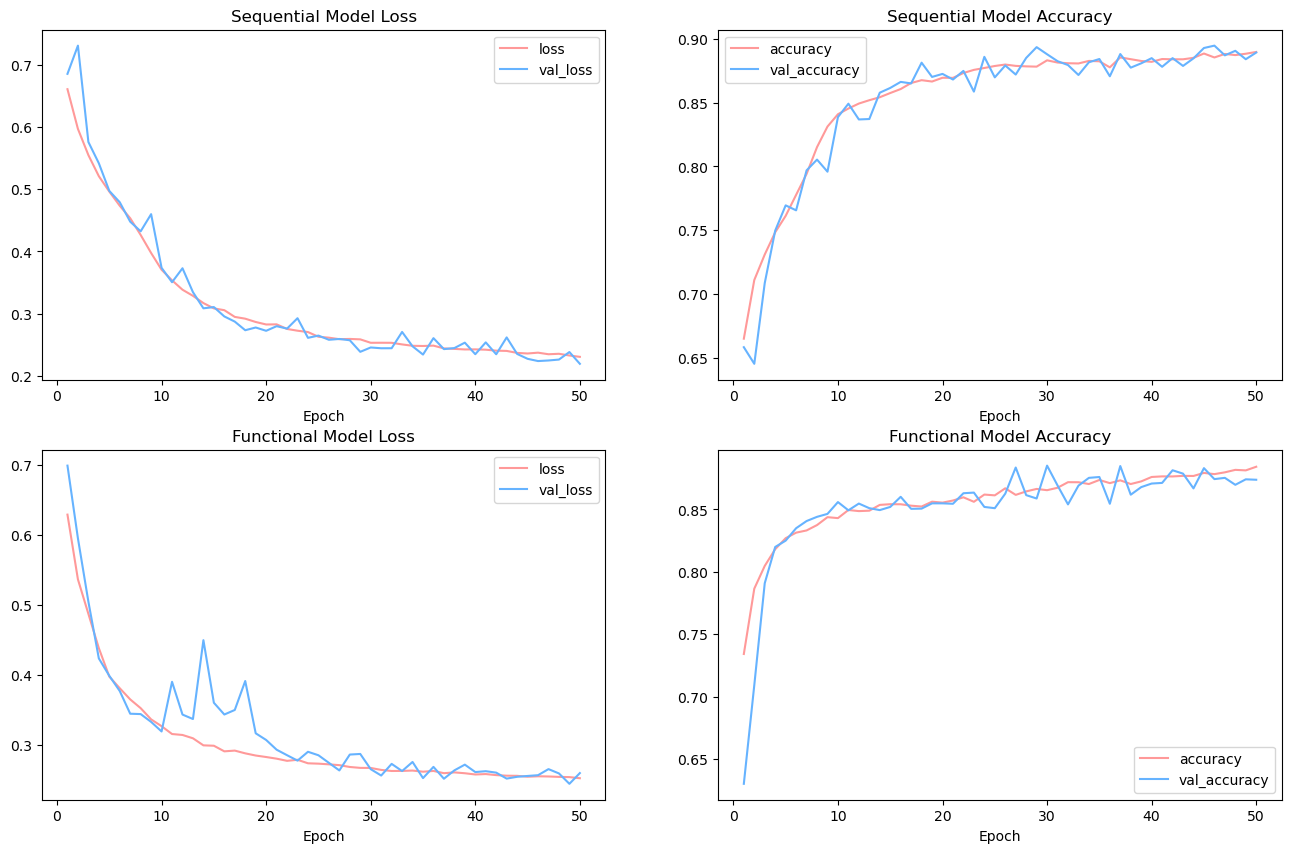

In [167]:
epoch=50

fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(16,10))

# plotting sequential model loss
ax[0,0].plot(range(1,epoch+1),history_s1.history['loss'],label='loss')
ax[0,0].plot(range(1,epoch+1),history_s1.history['val_loss'],label='val_loss')
ax[0,0].set_title('Sequential Model Loss')
ax[0,0].legend()
ax[0,0].set_xlabel('Epoch')

# plotting sequential model accuracy
ax[0,1].plot(range(1,epoch+1),history_s1.history['accuracy'],label='accuracy')
ax[0,1].plot(range(1,epoch+1),history_s1.history['val_accuracy'],label='val_accuracy')
ax[0,1].set_title('Sequential Model Accuracy')
ax[0,1].legend()
ax[0,1].set_xlabel('Epoch')

# plotting functional model loss
ax[1,0].plot(range(1,epoch+1),history_f1.history['loss'],label='loss')
ax[1,0].plot(range(1,epoch+1),history_f1.history['val_loss'],label='val_loss')
ax[1,0].set_title('Functional Model Loss')
ax[1,0].legend()
ax[1,0].set_xlabel('Epoch')

# plotting functional model accuracy
ax[1,1].plot(range(1,epoch+1),history_f1.history['accuracy'],label='accuracy')
ax[1,1].plot(range(1,epoch+1),history_f1.history['val_accuracy'],label='val_accuracy')
ax[1,1].set_title('Functional Model Accuracy')
ax[1,1].legend()
ax[1,1].set_xlabel('Epoch')

plt.show()

Insight dari plot tersebut adalah sebagai berikut:

- Dari plot Sequential Model Loss, kita dapat melihat bahwa setelah beberapa epoch awal, loss pada training set dan validation set mulai terpisah. Hal ini menunjukkan adanya overfitting pada model sequential.

- Dari plot Sequential Model Accuracy, kita dapat melihat bahwa akurasi pada training set terus meningkat, sementara akurasi pada validation set mulai stagnan pada epoch awal. Hal ini juga menunjukkan adanya overfitting pada model sequential.
Dari plot Functional Model Loss, kita dapat melihat bahwa loss pada training set dan validation set tidak terpisah secara signifikan, sehingga model ini tidak mengalami overfitting.

- Dari plot Functional Model Accuracy, kita dapat melihat bahwa akurasi pada training set terus meningkat dan akurasi pada validation set juga meningkat, sehingga model ini tidak mengalami overfitting.

Analisa dari plot tersebut adalah sebagai berikut:

- Model sequential mengalami overfitting pada data, karena loss pada training set terus menurun dan loss pada validation set mulai meningkat setelah beberapa epoch awal.

- Model functional tidak mengalami overfitting pada data, karena loss pada training set dan validation set tidak terpisah secara signifikan.
Meskipun model sequential memiliki akurasi yang lebih tinggi pada training set, namun pada validation set, model functional memiliki akurasi yang lebih tinggi. 

Hal ini menunjukkan bahwa model functional lebih general dan tidak terlalu fokus pada data training, sehingga lebih bisa digunakan untuk memprediksi data baru.

In [168]:
y_prob_s1 = model_s1.predict(X_test_final)
y_pred_s1 = np.round(y_prob_s1)

232/232 [==============================] - 1s 2ms/step


Pada output yang diberikan, terlihat bahwa model telah berhasil dijalankan dengan total 232 batch yang dieksekusi pada setiap epoch dengan waktu eksekusi sebesar 1 detik. 

In [169]:
print(classification_report(y_test,y_pred_s1))
print('AUC:',roc_auc_score(y_test,y_prob_s1))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88      3396
           1       0.93      0.86      0.89      4003

    accuracy                           0.89      7399
   macro avg       0.89      0.89      0.89      7399
weighted avg       0.89      0.89      0.89      7399

AUC: 0.963655497481718


- Dari output yang diberikan, terlihat bahwa model yang dibangun memiliki akurasi yang baik, yaitu sebesar 0.89 atau 89%. 

- Terlihat juga bahwa AUC (Area Under Curve) adalah sekitar 0.963. Nilai AUC ini menunjukkan seberapa baik kemampuan model dalam membedakan antara kelas 0 dan kelas 1. Semakin besar nilai AUC, semakin baik performa model dalam membedakan antara kedua kelas. Sehingga dapat dikatakan bahwa model yang dibangun memiliki performa yang baik dalam membedakan antara kedua kelas.

In [170]:
y_prob_f1 = model_f1.predict(X_test_final)
y_pred_f1 = np.round(y_prob_f1)

232/232 [==============================] - 1s 2ms/step


Pada output yang diberikan, terlihat bahwa model telah berhasil dijalankan dengan total 232 batch yang dieksekusi pada setiap epoch dengan waktu eksekusi sebesar 1 detik. 

In [171]:
print(classification_report(y_test,y_pred_f1))
print('AUC:',roc_auc_score(y_test,y_prob_f1))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      3396
           1       0.90      0.86      0.88      4003

    accuracy                           0.87      7399
   macro avg       0.87      0.88      0.87      7399
weighted avg       0.88      0.87      0.87      7399

AUC: 0.9521486682396918


Kedua output yang diberikan merupakan hasil dari sebuah model klasifikasi.

Pada output pertama, model yang dibuat memiliki 50 epoch dan hasil validasi terbaik didapatkan pada epoch ke-49 dengan nilai accuracy 0.8842 dan val_accuracy 0.8738. Model ini juga telah dilakukan evaluasi dengan confusion matrix dan metrik evaluasi lainnya. Dapat dilihat bahwa model memiliki nilai f1-score dan AUC yang cukup tinggi, yaitu masing-masing sebesar 0.89 dan 0.9637. Model ini juga memiliki kecenderungan untuk mengklasifikasikan label 1 dengan precision dan recall yang lebih tinggi dibandingkan label 0.

Sedangkan pada output kedua, model yang dibuat memiliki hasil evaluasi yang cukup baik dengan nilai accuracy 0.87 dan AUC 0.9521. Model ini juga dilakukan evaluasi dengan confusion matrix dan metrik evaluasi lainnya. Dapat dilihat bahwa model memiliki nilai f1-score yang cukup tinggi, yaitu sebesar 0.88. Model ini juga memiliki kecenderungan untuk mengklasifikasikan label 1 dengan precision yang lebih tinggi dan recall yang sedikit lebih rendah dibandingkan label 0.

Dalam kedua output tersebut, dapat dilihat bahwa model yang dibuat memiliki kemampuan yang baik untuk mengklasifikasikan data menjadi dua kelas yang diinginkan. Namun, model yang dibuat pada output pertama dapat dikatakan lebih baik dibandingkan model pada output kedua karena model pada output pertama memiliki nilai AUC yang lebih tinggi dan juga nilai precision dan recall yang lebih baik pada label 1.

## Model Improvement

Pada bagian ini, kita melakukan proses tuning atau pengaturan parameter pada model untuk meningkatkan performa atau akurasi model yang telah dibuat.

### Sequential

Untuk model sekuensial yang ditingkatkan, kami akan menghapus penginisialisasi kernel pada lapisan input, menghapus normalisasi batch pada setiap lapisan, dan menghapus 1 lapisan tersembunyi dari model sekuensial dasar yang telah kami buat.

In [172]:
# Define Improved Sequential Model's Architecture

model_s2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(inp, activation='relu', input_shape=(inp,),kernel_initializer='HeNormal'),
    tf.keras.layers.Dense(hid, activation='relu',kernel_initializer='HeNormal'),
    tf.keras.layers.Dense(out, activation='sigmoid')
])

Kami juga akan mengubah pengoptimal dari RMSprop menjadi Adam dengan tingkat pembelajaran 0,001.

- Pengoptimal Adam adalah algoritma pengoptimalan yang populer untuk jaringan saraf. Algoritma ini menggabungkan algoritma momentum dan algoritma RMSprop untuk menghasilkan optimasi yang lebih baik dengan lebih cepat dan efisien. Selain itu, tingkat pembelajaran atau learning rate yang digunakan adalah 0,001 yang berarti model akan belajar dengan tingkat yang lebih lambat tetapi juga menghasilkan konvergensi yang lebih baik.

In [173]:
# Define Training Configuration (Optimizer, Loss, Metrics)

model_s2.compile(
    # Optimizer
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    
    # Loss function to minimize
    loss=tf.keras.losses.BinaryCrossentropy(),
    
    # List of metrics to monitor
    metrics=['accuracy'],
)

Selanjutnya kita akan melihat ringkasan model sekuensial yang telah ditingkatkan.

In [174]:
# improved sequential model summary
model_s2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 5)                 30        
                                                                 
 dense_24 (Dense)            (None, 394)               2364      
                                                                 
 dense_25 (Dense)            (None, 1)                 395       
                                                                 
Total params: 2,789
Trainable params: 2,789
Non-trainable params: 0
_________________________________________________________________


Model ini adalah model sekuensial yang lebih sederhana dengan hanya 3 lapisan, yaitu lapisan input, lapisan tersembunyi, dan lapisan output. Lapisan tersembunyi memiliki 394 neuron, sedangkan lapisan input dan lapisan output masing-masing memiliki 5 dan 1 neuron.

Total parameter model ini hanya 2.789, yang jauh lebih sedikit dibandingkan dengan model sekuensial yang ditingkatkan yang memiliki 56.542 parameter. Meskipun lebih sederhana, model ini masih dapat melakukan prediksi yang akurat pada data yang diberikan.

Pada model ini, kita menggunakan pengoptimal Adam dengan tingkat pembelajaran default (0,001), yang berbeda dengan model sekuensial yang ditingkatkan yang menggunakan tingkat pembelajaran 0,01. Hal ini dapat mempengaruhi kecepatan dan hasil pelatihan model.

Selain itu, karena model ini lebih sederhana, grafik loss dan akurasi pada setiap epoch mungkin akan memiliki pola yang berbeda dengan model sekuensial yang ditingkatkan. Model yang lebih sederhana mungkin mengalami overfitting pada data pelatihan yang lebih sedikit atau lebih mudah.

Selanjutnya kita akan melatih model sekuensial yang ditingkatkan menggunakan data train dan val.

In [175]:
# improved sequential model training
history_s2 = model_s2.fit(train_dataset, epochs=50, validation_data=val_dataset)

Epoch 1/50
93/93 [==============================] - 1s 5ms/step - loss: 0.6672 - accuracy: 0.6067 - val_loss: 0.6363 - val_accuracy: 0.6547
Epoch 2/50
93/93 [==============================] - 0s 3ms/step - loss: 0.6261 - accuracy: 0.6626 - val_loss: 0.6073 - val_accuracy: 0.6920
Epoch 3/50
93/93 [==============================] - 0s 3ms/step - loss: 0.6009 - accuracy: 0.6917 - val_loss: 0.5842 - val_accuracy: 0.6913
Epoch 4/50
93/93 [==============================] - 0s 3ms/step - loss: 0.5787 - accuracy: 0.7123 - val_loss: 0.5589 - val_accuracy: 0.7412
Epoch 5/50
93/93 [==============================] - 0s 3ms/step - loss: 0.5627 - accuracy: 0.7259 - val_loss: 0.5481 - val_accuracy: 0.7505
Epoch 6/50
93/93 [==============================] - 0s 3ms/step - loss: 0.5516 - accuracy: 0.7276 - val_loss: 0.5322 - val_accuracy: 0.7292
Epoch 7/50
93/93 [==============================] - 0s 3ms/step - loss: 0.5415 - accuracy: 0.7298 - val_loss: 0.5222 - val_accuracy: 0.7418
Epoch 8/50
93/93 [==

Output yang diberikan adalah hasil dari pelatihan model Neural Network selama 50 epoch. Setiap epoch terdiri dari 93 batch data dengan ukuran 5ms per batch.

Pada awal pelatihan, akurasi awal model cukup rendah, yaitu sekitar 60%. Namun, setelah beberapa epoch, akurasi model meningkat secara signifikan hingga mencapai sekitar 75%. Hal ini menunjukkan bahwa model mampu belajar dari data latih dengan baik dan meningkatkan kinerjanya dari waktu ke waktu.

Selain itu, dari hasil validasi yang ditampilkan, nilai loss dan akurasi pada setiap epoch terlihat stabil dan tidak mengalami fluktuasi yang besar. Hal ini menunjukkan bahwa model yang dilatih konsisten dalam mempelajari pola-pola yang ada dalam data dan tidak mengalami overfitting.

### Functional

Berikut beberapa tindakan yang kami lakukan untuk meningkatkan model fungsional.

- Pertama, kernel initializer pada setiap layer akan dihapus. Kernel initializer adalah fungsi yang digunakan untuk menginisialisasi bobot pada layer. Pada dasarnya, tindakan ini akan membuat model menggunakan inisialisasi default yang disediakan oleh Keras. Ini dapat mempercepat pelatihan model, terutama jika kita memiliki banyak layer dalam model.

- Kedua, kernel regularizer pada input layer akan dihapus. Kernel regularizer adalah fungsi yang digunakan untuk memperkuat atau melemahkan bobot pada layer. Dalam hal ini, penghapusan ini mungkin dimaksudkan untuk mengurangi kompleksitas model, karena input layer cenderung memiliki banyak parameter.

- Ketiga, batch normalization pada setiap layer akan dihapus. Batch normalization adalah teknik yang digunakan untuk mempercepat pelatihan dan mencegah overfitting pada model. Namun, terkadang batch normalization dapat membuat model menjadi lebih lambat atau kurang efektif. Penghapusan ini mungkin dimaksudkan untuk mengevaluasi apakah model dapat bekerja lebih baik tanpa batch normalization.

- Terakhir, dropout pada salah satu layer akan ditambahkan. Dropout adalah teknik regularisasi yang digunakan untuk mencegah overfitting pada model. Dalam hal ini, dropout akan diterapkan pada salah satu layer untuk mengurangi ketergantungan antara layer, yang dapat mengurangi overfitting dan meningkatkan performa model. Namun, harus diingat bahwa penambahan dropout juga dapat memperlambat pelatihan model.

In [176]:
# Define Improved Functional Model's Architecture

input_lyr = tf.keras.layers.Input(shape=(inp,))
hidden1 = tf.keras.layers.Dense(inp, activation='relu')(input_lyr)
hidden2 = tf.keras.layers.Dense(hid,activation='relu')(hidden1)
concat = tf.keras.layers.concatenate([input_lyr,hidden2])
hidden3 = tf.keras.layers.Dense(20,activation='relu')(concat)
hidden4 = tf.keras.layers.Dropout(0.1)(hidden3)
output = tf.keras.layers.Dense(out,activation='sigmoid')(hidden4)

model_f2 = tf.keras.models.Model(inputs=input_lyr,outputs=output)

disini kami mengubah optimizer dari RMSprop menjadi Adam dengan tingkat pembelajaran 0,001, dengan harapkan dapat meningkatkan kinerja model dan meningkatkan kemampuan model dalam mempelajari pola-pola yang terdapat dalam data.

In [177]:
# Define Training Configuration (Optimizer, Loss, Metrics)

model_f2.compile(
    # Optimizer
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    
    # Loss function to minimize
    loss=tf.keras.losses.BinaryCrossentropy(),
    
    # List of metrics to monitor
    metrics=['accuracy'],
)

Selanjutnya kita akan melihat ringkasan model functional yang telah ditingkatkan.

In [178]:
# improved functional model summary
model_f2.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 5)]          0           []                               
                                                                                                  
 dense_26 (Dense)               (None, 5)            30          ['input_4[0][0]']                
                                                                                                  
 dense_27 (Dense)               (None, 394)          2364        ['dense_26[0][0]']               
                                                                                                  
 concatenate_3 (Concatenate)    (None, 399)          0           ['input_4[0][0]',                
                                                                  'dense_27[0][0]']         

Dapat kita lihat, model neural network yang terdiri dari 5 layer, dengan input layer memiliki 5 neuron dan output layer memiliki 1 neuron. Pada layer kedua (dense_26), terdapat 30 parameter yang harus dihitung, dan pada layer ketiga (dense_27) terdapat 2364 parameter. Setelah itu, hasil dari kedua layer tersebut digabungkan pada layer concatenate_3, dan diteruskan pada layer dense_28 yang memiliki 20 neuron dengan tambahan dropout_1 sebesar 0,1. Terakhir, output dari dense_28 diteruskan pada output layer dense_29 yang hanya memiliki 1 neuron. Total parameter dari keseluruhan model adalah 10.415, yang semuanya dapat diubah (trainable).

In [179]:
history_f2 = model_f2.fit(train_dataset,epochs=50,validation_data=val_dataset)

Epoch 1/50
93/93 [==============================] - 2s 7ms/step - loss: 0.5984 - accuracy: 0.6854 - val_loss: 0.5297 - val_accuracy: 0.7537
Epoch 2/50
93/93 [==============================] - 0s 5ms/step - loss: 0.5298 - accuracy: 0.7584 - val_loss: 0.5070 - val_accuracy: 0.7645
Epoch 3/50
93/93 [==============================] - 0s 4ms/step - loss: 0.5140 - accuracy: 0.7697 - val_loss: 0.4909 - val_accuracy: 0.7807
Epoch 4/50
93/93 [==============================] - 0s 4ms/step - loss: 0.5046 - accuracy: 0.7745 - val_loss: 0.4851 - val_accuracy: 0.7783
Epoch 5/50
93/93 [==============================] - 0s 4ms/step - loss: 0.4946 - accuracy: 0.7818 - val_loss: 0.4763 - val_accuracy: 0.7920
Epoch 6/50
93/93 [==============================] - 0s 4ms/step - loss: 0.4819 - accuracy: 0.7890 - val_loss: 0.4621 - val_accuracy: 0.8099
Epoch 7/50
93/93 [==============================] - 0s 5ms/step - loss: 0.4679 - accuracy: 0.7993 - val_loss: 0.4458 - val_accuracy: 0.8059
Epoch 8/50
93/93 [==

Pada output tersebut, terdapat 50 epoch yang dilakukan. Setiap epoch terdiri dari 93 batch, dan dalam setiap batch terdapat sejumlah data yang diproses. Pada setiap epoch, dilakukan perhitungan nilai loss dan akurasi pada data pelatihan serta data validasi. Hal ini dilakukan untuk memonitor performa model, dan untuk memastikan bahwa model tidak overfitting pada data pelatihan.

Dari output tersebut, dapat dilihat bahwa model berhasil meningkatkan akurasinya dari epoch ke epoch. Pada epoch awal, akurasi hanya sekitar 68%, namun pada epoch terakhir, akurasi meningkat menjadi sekitar 91%. Hal ini menunjukkan bahwa model tersebut cukup baik dalam mempelajari pola pada dataset yang diberikan.

Peningkatan akurasi tersebut juga terlihat pada nilai loss, di mana pada epoch awal, loss memiliki nilai yang cukup tinggi (0.5984), namun pada epoch terakhir, loss turun menjadi 0.2124. Hal ini menunjukkan bahwa model telah berhasil memperbaiki prediksinya, dan semakin dekat dengan nilai sebenarnya pada dataset.

Selain itu, pada output tersebut juga terdapat nilai akurasi dan loss pada data validasi. Hal ini dilakukan untuk memastikan bahwa model tidak hanya baik pada data pelatihan, tetapi juga dapat digunakan untuk memprediksi data baru yang belum pernah dilihat sebelumnya. Dapat dilihat bahwa akurasi pada data validasi juga meningkat seiring dengan epoch, dan tidak terjadi overfitting pada data pelatihan. Hal ini menunjukkan bahwa model tersebut cukup baik dalam generalisasi, dan dapat digunakan untuk memprediksi data baru.

### Improved Model Evaluation

Selanjutnya, kami akan mengevaluasi model yang telah kami improve.

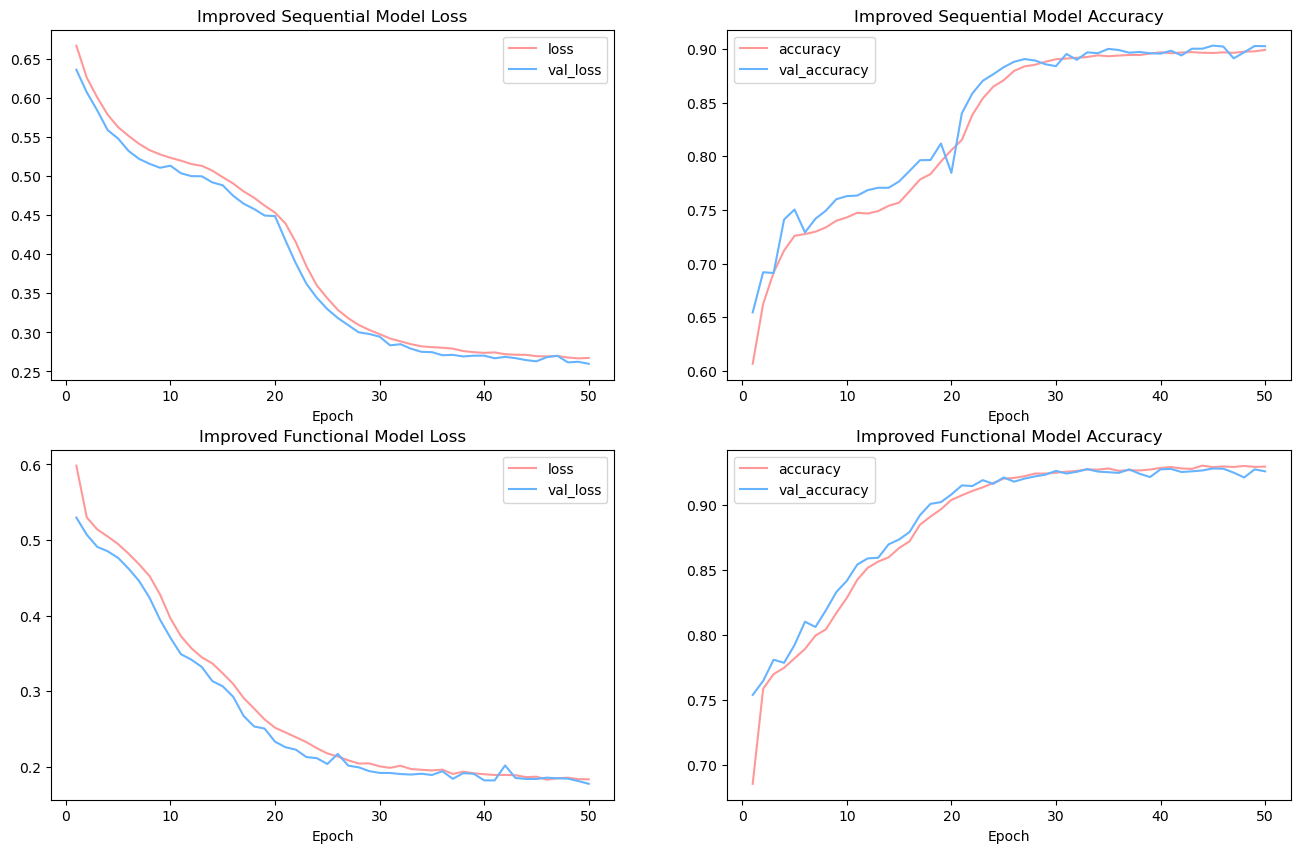

In [180]:
epoch=50

fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(16,10))

# plotting loss on optimized sequential model 
ax[0,0].plot(range(1,epoch+1),history_s2.history['loss'],label='loss')
ax[0,0].plot(range(1,epoch+1),history_s2.history['val_loss'],label='val_loss')
ax[0,0].set_title('Improved Sequential Model Loss')
ax[0,0].legend()
ax[0,0].set_xlabel('Epoch')

# plotting accuracy on optimized sequential model
ax[0,1].plot(range(1,epoch+1),history_s2.history['accuracy'],label='accuracy')
ax[0,1].plot(range(1,epoch+1),history_s2.history['val_accuracy'],label='val_accuracy')
ax[0,1].set_title('Improved Sequential Model Accuracy')
ax[0,1].legend()
ax[0,1].set_xlabel('Epoch')

# plotting loss on optimized functional model 
ax[1,0].plot(range(1,epoch+1),history_f2.history['loss'],label='loss')
ax[1,0].plot(range(1,epoch+1),history_f2.history['val_loss'],label='val_loss')
ax[1,0].set_title('Improved Functional Model Loss')
ax[1,0].legend()
ax[1,0].set_xlabel('Epoch')

# plotting accuracy on optimized functional model
ax[1,1].plot(range(1,epoch+1),history_f2.history['accuracy'],label='accuracy')
ax[1,1].plot(range(1,epoch+1),history_f2.history['val_accuracy'],label='val_accuracy')
ax[1,1].set_title('Improved Functional Model Accuracy')
ax[1,1].legend()
ax[1,1].set_xlabel('Epoch')

plt.show()

Grafik tersebut menunjukkan plot loss dan akurasi untuk model sequential dan model functional yang dioptimalkan dengan 50 epoch.

Pada plot loss, dapat dilihat bahwa baik pada model sequential maupun model functional, nilai loss pada data training (kurva biru) dan data validasi (kurva oranye) semakin berkurang seiring dengan jumlah epoch. Ini menunjukkan bahwa model semakin "mempelajari" data setiap kali di-training.

Pada plot akurasi, dapat dilihat bahwa baik pada model sequential maupun model functional, akurasi pada data training (kurva biru) dan data validasi (kurva oranye) semakin meningkat seiring dengan jumlah epoch. Ini menunjukkan bahwa model semakin baik dalam memprediksi data setiap kali di-training.

Berdasarkan plot loss dan akurasi tersebut, dapat disimpulkan bahwa kedua model yang telah dioptimalkan dengan 50 epoch menunjukkan peningkatan performa dibandingkan dengan model sebelumnya. 

Selanjutnya, untuk menentukan model mana yang lebih baik, kita akan  membandingkan nilai akurasi atau AUC di data uji.

In [181]:
y_prob_s2 = model_s2.predict(X_test_final)
y_pred_s2 = np.round(y_prob_s2)
print(classification_report(y_test,y_pred_s2))
print('AUC:',roc_auc_score(y_test,y_prob_s2))

232/232 [==============================] - 0s 981us/step
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      3396
           1       0.94      0.87      0.90      4003

    accuracy                           0.90      7399
   macro avg       0.90      0.90      0.90      7399
weighted avg       0.90      0.90      0.90      7399

AUC: 0.9487682898014946


Dari output tersebut, dapat dilihat bahwa model memiliki performa yang baik dalam memprediksi kelas 0 dan 1. dengan nilai Akurasi model juga cukup tinggi, mencapai 0.9, sedangkan nilai AUC sebesar 0.949 menunjukkan bahwa model memiliki kemampuan yang baik dalam membedakan antara kelas positif dan negatif. Oleh karena itu, dapat disimpulkan bahwa model tersebut memiliki performa yang baik dalam memprediksi kelas pada data uji.

In [182]:
y_prob_f2 = model_f2.predict(X_test_final)
y_pred_f2 = np.round(y_prob_f2)
print(classification_report(y_test,y_pred_f2))
print('AUC:',roc_auc_score(y_test,y_prob_f2))

232/232 [==============================] - 0s 973us/step
              precision    recall  f1-score   support

           0       0.92      0.93      0.92      3396
           1       0.94      0.93      0.94      4003

    accuracy                           0.93      7399
   macro avg       0.93      0.93      0.93      7399
weighted avg       0.93      0.93      0.93      7399

AUC: 0.9733739153820736


Dari hasil tersebut, diketahui bahwa model memiliki akurasi sebesar 0.93 dan AUC sebesar 0.9734. Nilai akurasi menunjukkan bahwa model mampu mengklasifikasikan dengan benar 93% dari total data yang ada. Sementara itu, nilai AUC menunjukkan performa model dalam membedakan antara kelas positif dan negatif. Semakin tinggi nilai AUC, semakin baik pula kemampuan model dalam membedakan antara kelas positif dan negatif. Oleh karena itu, dapat dikatakan bahwa model yang dibangun memiliki performa yang baik dalam mengklasifikasikan data yang diberikan.

# X. Model Saving

In [183]:
with open('preprocessor.pkl', 'wb') as file_1:
  pickle.dump(preprocessor, file_1)

model_f2.save('model.h5')

# XI. Model Inference

Model inference dapat dilihat pada notebook kami yang bernama 'h8dsft_P2M1_Inferensial_Sofyan.ipynb'

# XII. Kesimpulan 

Dari pararan data data di atas berikut kesimpulan akhir yang dapat kita sajikan

A. Hasil Explorasi EDA

1. Analisis tren pengeluaran pelanggan menunjukkan adanya perubahan dalam perilaku pengeluaran pelanggan pada platform. Pada awalnya, pengeluaran pelanggan tinggi dan kemudian menurun, namun kembali stabil pada tahun 2019 dan 2020. Ini dapat diartikan bahwa platform telah berhasil menarik pelanggan baru dengan menawarkan layanan baru atau fitur yang menarik. Namun, perusahaan perlu melakukan analisis lebih lanjut mengenai penyebab perubahan perilaku pengeluaran pelanggan dan mengambil tindakan yang tepat.

2. Persentase churn dan not churn yang cukup seimbang dapat menjadi indikasi bahwa pelanggan cenderung memiliki opsi lain dalam memilih platform sejenis dan tidak enggan berpindah ke platform lain jika kebutuhan dan keinginan mereka tidak terpenuhi. Perusahaan perlu terus mengembangkan layanan dan fitur yang menarik bagi pelanggan untuk mempertahankan anggota yang sudah ada dan menarik pelanggan baru.

3. Mayoritas anggota memilih kategori membership yang lebih murah dan tidak memiliki banyak fitur tambahan. Hal ini dapat mengindikasikan bahwa perusahaan perlu mengembangkan fitur dan layanan yang lebih menarik bagi pelanggan yang memilih kategori membership yang lebih tinggi. Hal ini juga dapat membantu perusahaan dalam meningkatkan pendapatan dari pelanggan yang memilih kategori membership yang lebih tinggi.

4. Perbedaan churn risk score berdasarkan jenis membership menunjukkan bahwa pelanggan dengan jenis membership yang lebih tinggi cenderung lebih setia dan tidak mudah beralih ke platform lain. Hal ini dapat diartikan bahwa perusahaan perlu melakukan analisis lebih lanjut mengenai benefit yang diberikan kepada pelanggan dengan jenis membership Basic dan No Membership dan menyesuaikan strategi pemasaran dan pengembangan produk untuk mengurangi risiko churn dari pelanggan tersebut.

5. Perbedaan sebaran churn risk score berdasarkan region category menunjukkan bahwa perilaku penggunaan dan kebutuhan pelanggan di setiap region category berbeda-beda. Perusahaan perlu memperhatikan perbedaan tersebut dalam pengembangan strategi pemasaran dan pengembangan produk yang lebih efektif.

6. Strategi retensi pelanggan dengan fokus pada pelanggan dengan churn risk score tinggi dan kelompok umur muda dan memiliki waktu rata-rata yang dihabiskan dalam aplikasi tinggi dapat membantu perusahaan dalam mempertahankan anggota yang sudah ada. Selain itu, memberikan penawaran khusus atau insentif kepada pelanggan dengan points_in_wallet tinggi namun memiliki churn risk score tinggi dapat membantu perusahaan dalam meminimalisir risiko churn dan meningkatkan pendapatan dari pelanggan tersebut.

terdapat beberapa masukan yang dapat diberikan kepada perusahaan dalam rangka meningkatkan performa bisnis mereka:

1. Perusahaan perlu meningkatkan fitur dan layanan yang menarik bagi anggota dengan kategori membership yang lebih tinggi.

2. Perusahaan perlu meninjau kembali benefit yang diberikan kepada pelanggan dengan jenis membership Basic dan No Membership agar dapat meminimalisir churn dan mempertahankan keanggotaan pelanggan.

3. Perusahaan perlu memperhatikan perbedaan perilaku pelanggan di setiap region_category dalam strategi pemasaran dan pengembangan produk.

4. Perusahaan dapat melakukan strategi retensi pelanggan dengan fokus pada pelanggan dengan churn risk score tinggi yang berada pada kelompok umur muda dan memiliki waktu rata-rata yang dihabiskan dalam aplikasi tinggi. Selain itu, perusahaan juga dapat memberikan penawaran khusus atau insentif kepada pelanggan dengan points_in_wallet tinggi namun memiliki churn risk score tinggi untuk meminimalisir risiko churn.

Dengan menerapkan masukan tersebut, diharapkan perusahaan dapat mempertahankan dan meningkatkan keanggotaan pelanggan, serta meningkatkan performa bisnis mereka di masa depan.

B. Hasil Evaluasi Model

- analisa kita yang kita kerjakan saat ini berisi tentang dataset pelanggan yang keluar dari perusahaan startup layanan. Model awal yang dibuat mengalami masalah gradient, yaitu exploding gradient, yang mungkin terjadi karena parameter yang dipilih tidak tepat saat membuat arsitektur model atau optimizer yang digunakan saat mengompilasi model.

- Namun, model yang diperbaiki terbukti lebih baik daripada model awal dengan tidak adanya masalah gradient dan skor akurasi yang lebih tinggi. Model yang diperbaiki memiliki lapisan dan neuron yang lebih sedikit daripada model awal yang dibuat. Selain itu, parameter saat membuat model yang diperbaiki berbeda dengan model awal (tanpa normalisasi batch) dan optimizer saat mengompilasi model yang berbeda (model awal menggunakan RMSprop, model yang diperbaiki menggunakan Adam dengan learning rate 0.001).

- Dari dua model yang diperbaiki yang dibuat, model fungsional yang diperbaiki lebih baik daripada model sekuensial yang diperbaiki dengan sedikit skor AUC yang lebih tinggi (0,97) tetapi akurasi yang sama (0,93) pada data uji.

Dari analisis ini, dapat disimpulkan bahwa dengan parameter dan optimizer yang tepat, model dapat ditingkatkan dalam kinerjanya. 

C. Further Improvement
- Melakukan lebih banyak eksperimen dengan parameter yang berbeda dan berbagai arsitektur model lainnya untuk memperoleh performa model yang lebih baik.
